Wallmart Capstone Project

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('/content/Walmart DataSet.csv')

In [3]:
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
df.isna().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
columns = ['CPI', 'Fuel_Price', 'Store', 'Temperature', 'Unemployment',
       'Weekly_Sales']
columns

['CPI', 'Fuel_Price', 'Store', 'Temperature', 'Unemployment', 'Weekly_Sales']

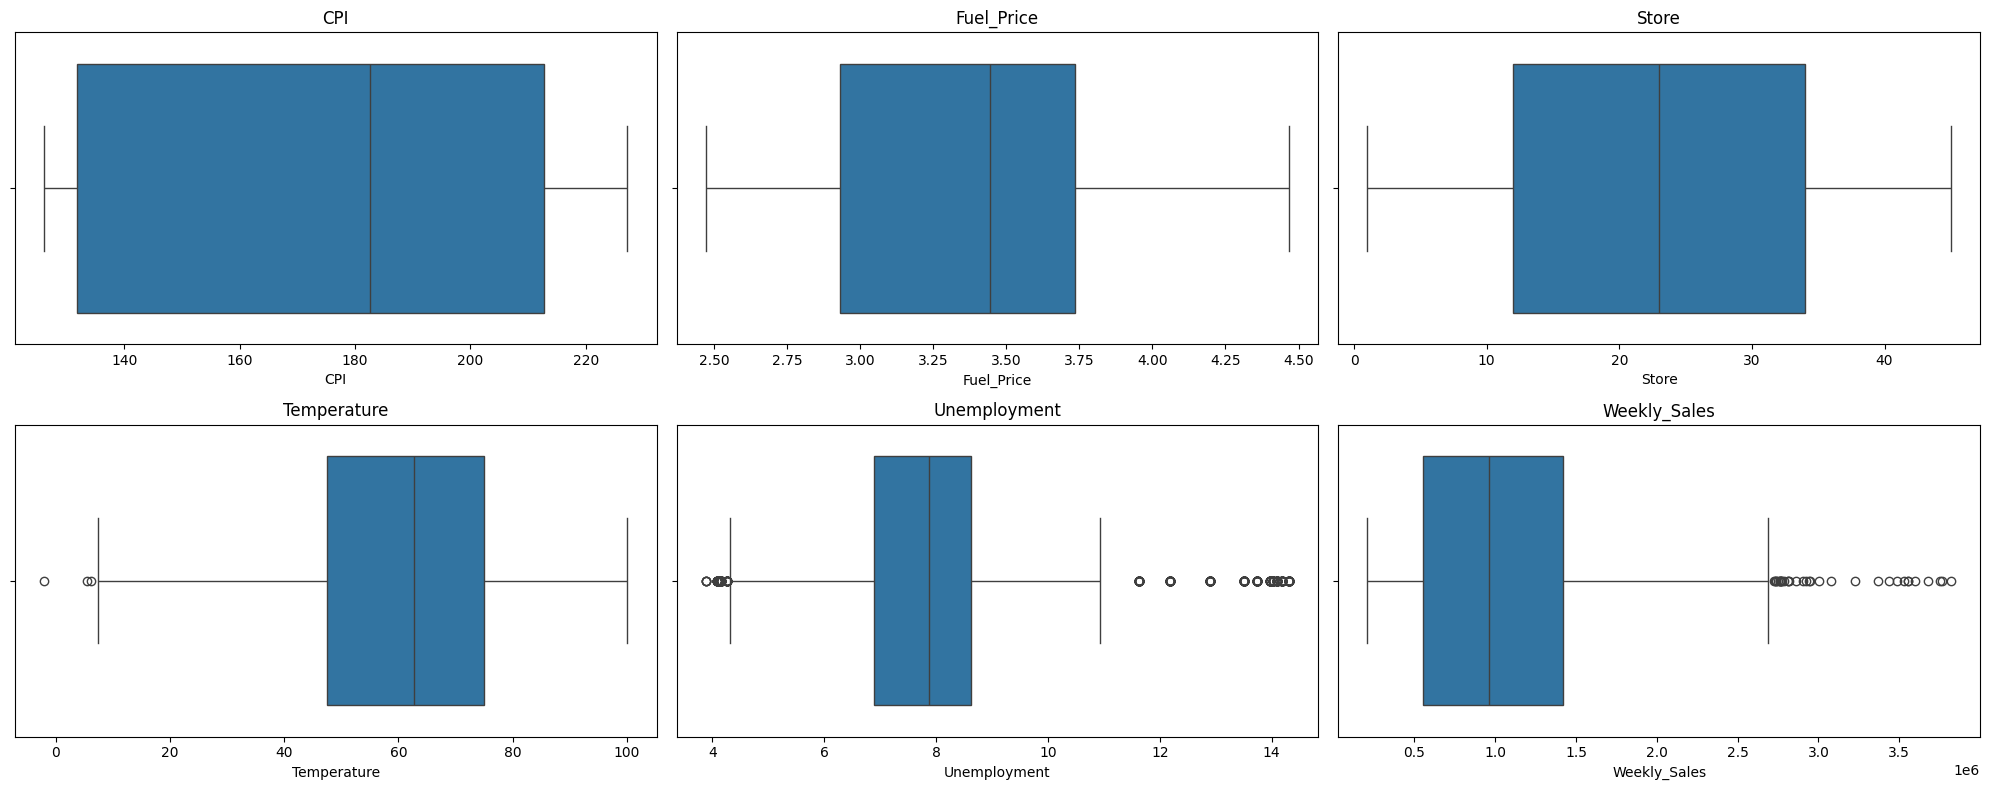

In [8]:

plt.figure(figsize=(20,8))


for i,col in enumerate(columns):
    plt.subplot(2,3,i+1)
    sns.boxplot(x=df[col])
    plt.tight_layout()
    plt.title(col)
plt.show()

In [9]:

def remove_outliers(df1,col):

    q1=df1[col].quantile(0.25)

    q3=df1[col].quantile(0.75) #
    IQR=q3-q1
    Lower_Band = q1-1.5*IQR
    Upper_Band = q3+1.5*IQR
    df[col]=np.clip(df[col],Lower_Band,Upper_Band)
    return df1

# Defining the function that can remove outliers
def treat_outliers(df1,col_list):
    for col in col_list:
        df1=remove_outliers(df1,col)
    return df1

In [10]:
df = treat_outliers(df,columns)

In [11]:
df_store = df.groupby('Store')['Weekly_Sales'].sum().reset_index()

In [12]:
top_10 = df_store.sort_values(by='Weekly_Sales',ascending=False).head(10)

top_10

Store  Weekly_Sales
19     20  2.990663e+08
3       4  2.973575e+08
13     14  2.870091e+08
12     13  2.845247e+08
1       2  2.741628e+08
9      10  2.692807e+08
26     27  2.534795e+08
5       6  2.237489e+08
0       1  2.224028e+08
38     39  2.074455e+08

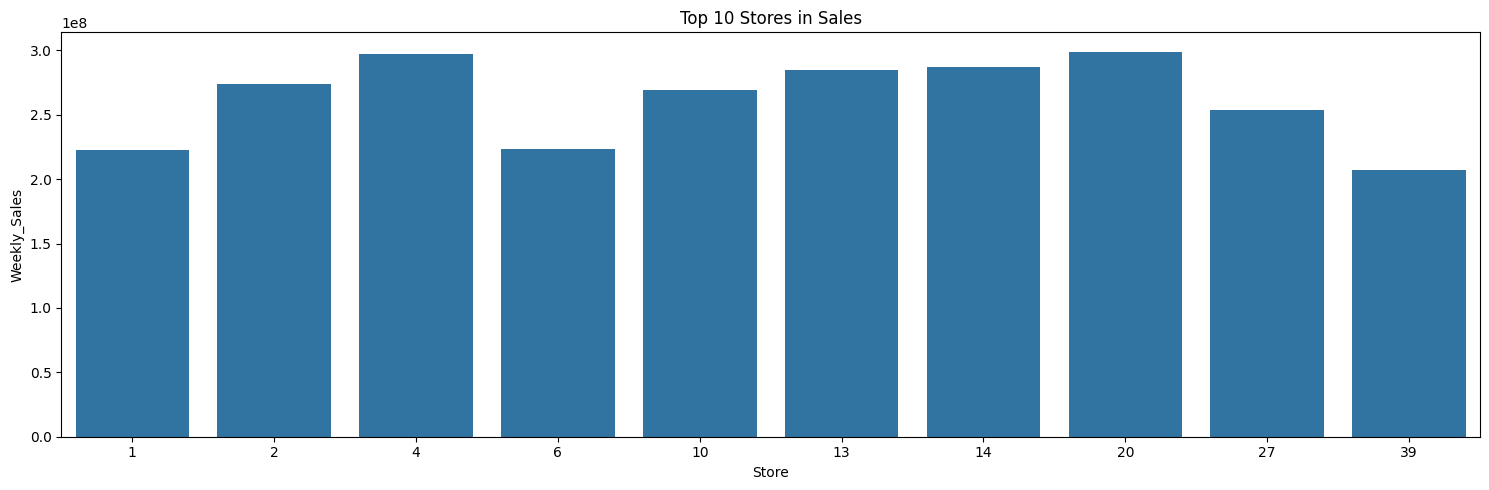

In [13]:
plt.figure(figsize=(15,5))
sns.barplot(x='Store',y='Weekly_Sales',data=top_10)
plt.title('Top 10 Stores in Sales')
plt.xlabel('Store')
plt.ylabel('Weekly_Sales')
plt.tight_layout()
plt.show()

In [14]:
df['Date']=pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [15]:
df_date_sales = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
df_date_sales=df_date_sales.sort_values(by='Date',ascending=True)
df_date_sales.head(5)

Date  Weekly_Sales
0 2010-02-05   49750740.50
1 2010-02-12   48336677.63
2 2010-02-19   48276993.78
3 2010-02-26   43968571.13
4 2010-03-05   46871470.30

Text(0, 0.5, 'Sales')

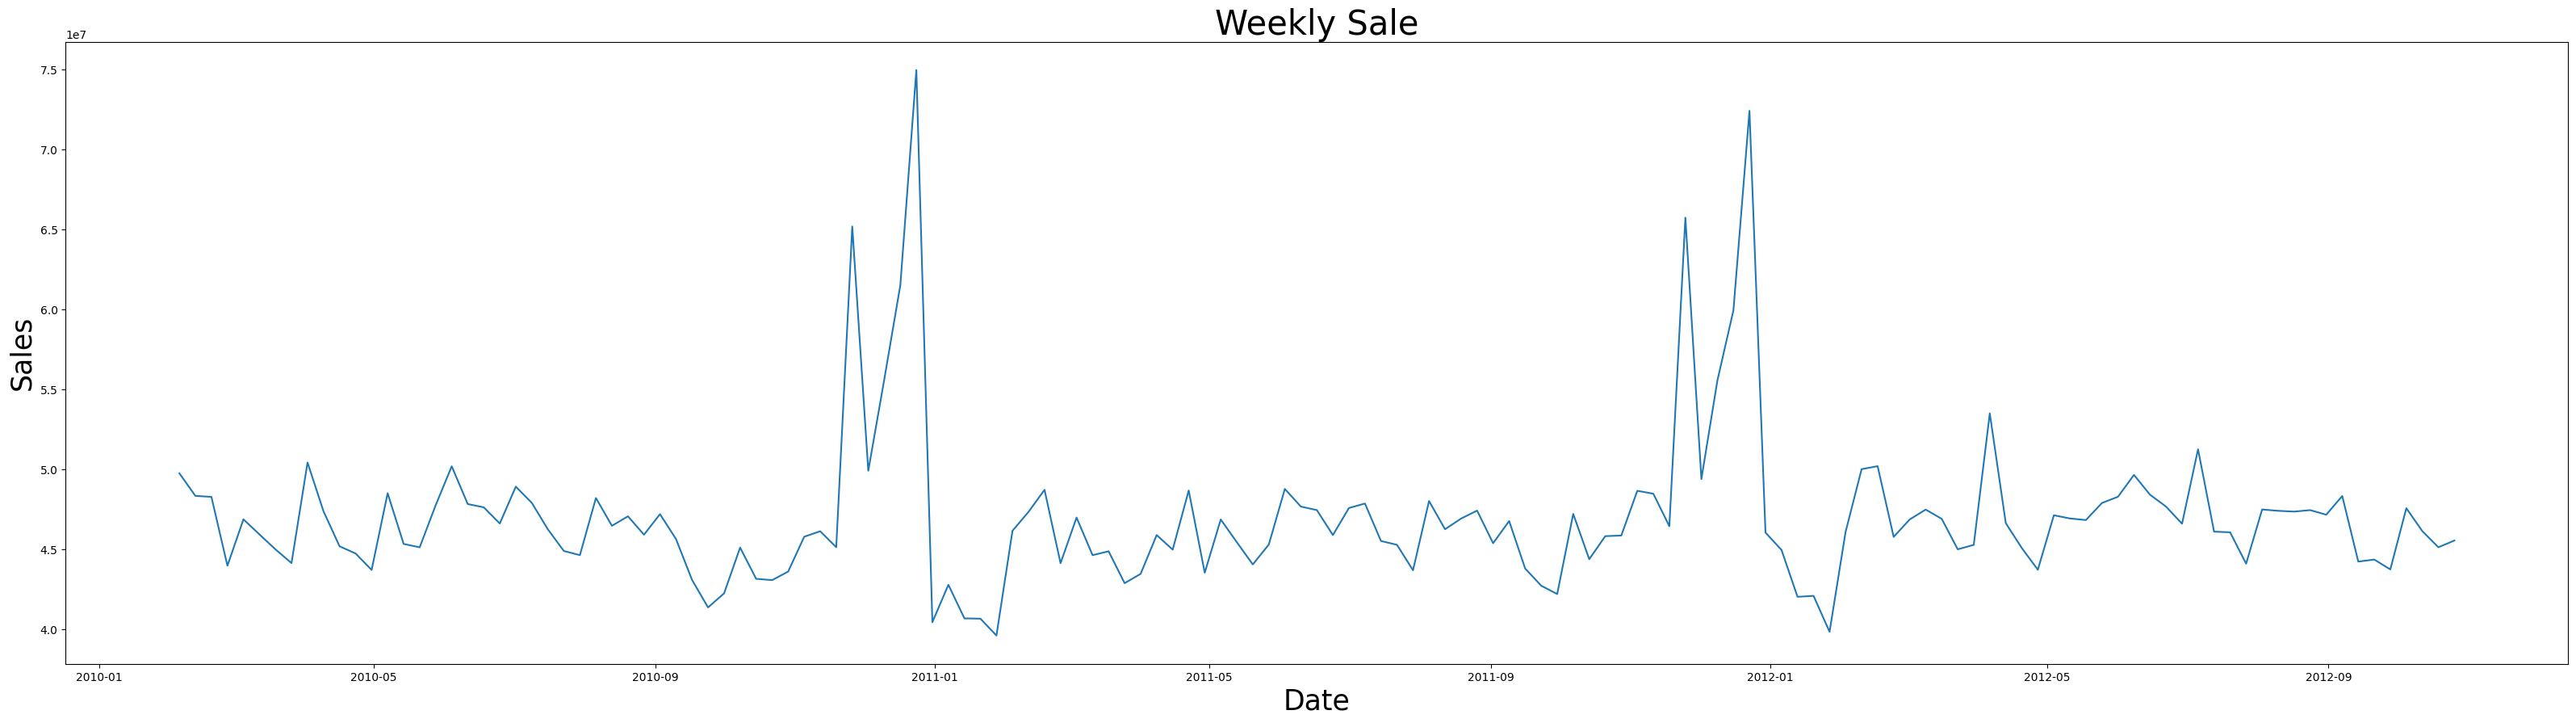

In [16]:
plt.figure(figsize=(40,10))
sns.lineplot(x='Date',y='Weekly_Sales',data=df_date_sales)
plt.title('Weekly Sale',fontsize=30)
plt.xlabel('Date',fontsize=25)
plt.ylabel('Sales',fontsize=25)

a. If the weekly sales are affected by the unemployment rate, if yes - which stores are suffering the most?

In [17]:
lf = LabelEncoder()
bin_ur = [4,6,8,10,12]
label_ur = ['4-6','6.1-8','8.1-10','10.1-12']

In [18]:
df['Unemployment_new']= pd.cut(df['Unemployment'],bins=bin_ur,labels=label_ur)

In [19]:
df['Unemployment_new'].value_counts()

Unemployment_new
6.1-8      2795
8.1-10     2389
10.1-12     629
4-6         622
Name: count, dtype: int64

In [20]:
df_ur =df.groupby('Unemployment_new')['Weekly_Sales'].sum().reset_index()

<Axes: xlabel='Unemployment_new', ylabel='Weekly_Sales'>

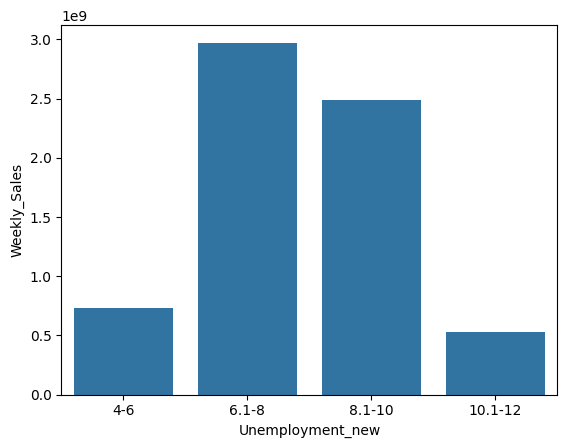

In [21]:
sns.barplot(x='Unemployment_new',y='Weekly_Sales',data=df_ur)

In [22]:
df['Unemployment_new'] = lf.fit_transform(df['Unemployment_new'])

In [23]:
df['Unemployment_new'].value_counts()

Unemployment_new
2    2795
3    2389
0     629
1     622
Name: count, dtype: int64

In [24]:
ur_df  = df[df['Unemployment_new'].isin([1,0
                                         ])]

In [25]:
ur_sales = ur_df.groupby('Store')['Weekly_Sales'].sum().reset_index()

In [26]:
ur_sales

Store  Weekly_Sales
0       4  1.782381e+08
1       5  1.416884e+07
2       6  4.684711e+07
3       8  3.923392e+07
4       9  2.397403e+07
5      12  1.442872e+08
6      13  6.152466e+07
7      16  2.016068e+06
8      17  1.623276e+07
9      23  1.987367e+08
10     28  1.892637e+08
11     29  3.276784e+07
12     33  2.299155e+06
13     34  6.496434e+07
14     38  5.515963e+07
15     40  1.378703e+08
16     43  4.080224e+07
17     44  1.418737e+07

In [27]:
print('Most Suffered Stores with Unemployment Rate')
ur_sales.sort_values(by='Weekly_Sales',ascending=True).head()

Most Suffered Stores with Unemployment Rate


Store  Weekly_Sales
7      16    2016067.98
12     33    2299155.24
1       5   14168838.13
17     44   14187373.72
8      17   16232762.69

b. If the weekly sales show a seasonal trend, when and what could be the reason?

In [28]:
df_ss =df.groupby('Date')['Weekly_Sales'].sum().reset_index()
df_ss.set_index('Date',inplace=True)
from statsmodels.tsa.seasonal import seasonal_decompose
sales_decomposition=seasonal_decompose(df_ss['Weekly_Sales'],period=13)


Figure(640x480)


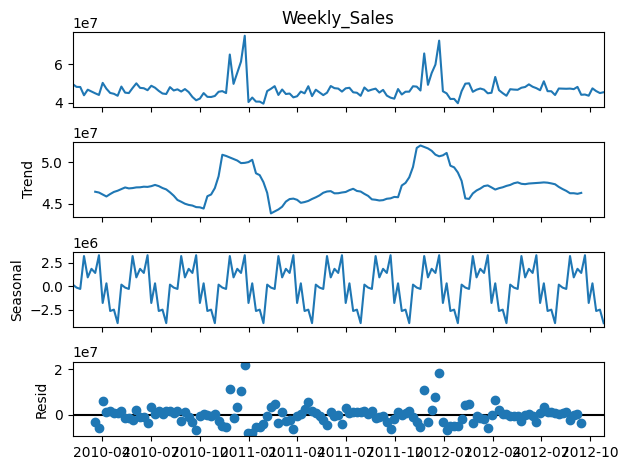

In [29]:
print(sales_decomposition.plot())

In [30]:
df_Temperature =df.groupby('Date')['Temperature'].sum().reset_index()
df_Temperature.set_index('Date',inplace=True)
Temperature_decomposition=seasonal_decompose(df_Temperature['Temperature'],period=13)

Figure(640x480)


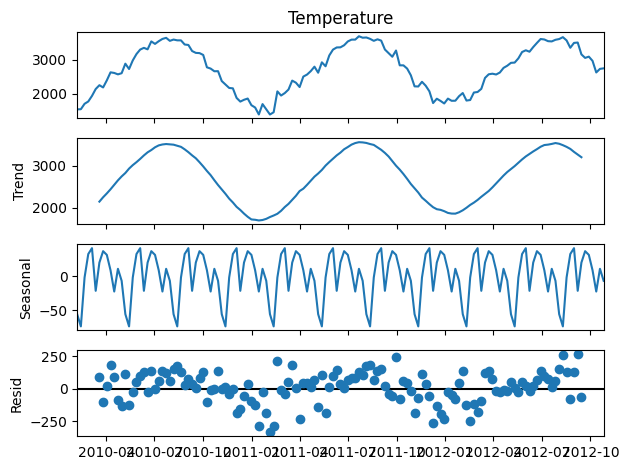

In [31]:
print(Temperature_decomposition.plot())

Theres an inverse relationship between Temperature and weekly sales. When temperature decrease, weekly sales tend to rise and vice versa

. Does temperature affect the weekly sales in any manner?

<Axes: >

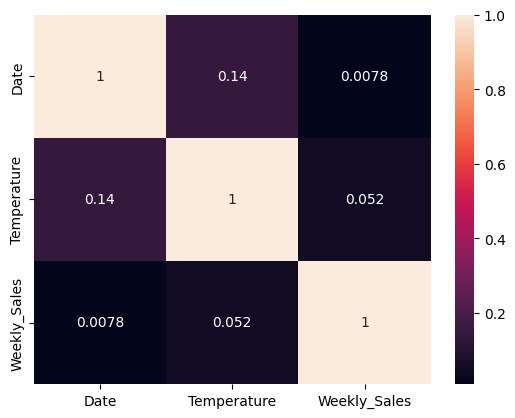

In [32]:
df_tp = df.groupby(['Date','Temperature'])['Weekly_Sales'].sum().reset_index()
df_tp_corr = df_tp.corr()
sns.heatmap(df_tp_corr,annot=True)

Yes the temperature is affecting the weekly sales

How is the Consumer Price index affecting the weekly sales of various stores?

<Axes: >

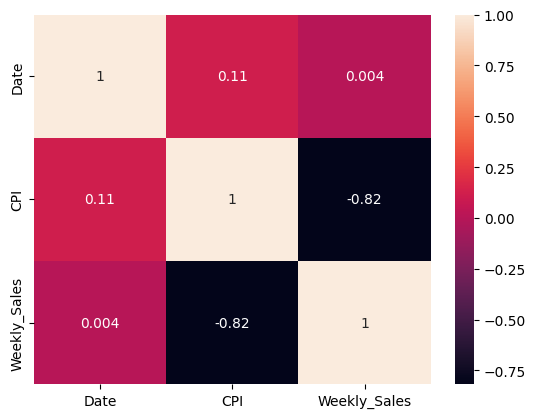

In [33]:
df_cpi = df.groupby(['Date','CPI'])['Weekly_Sales'].sum().reset_index()
df_cpi_corr = df_cpi.corr()
sns.heatmap(df_cpi_corr,annot=True)

In [36]:
bins_cpi=[125,155,185,215,245]
label_cpi=['125-155','156-185','186-215','216-245',]
df['CPI_cat']= pd.cut(df['CPI'],bins=bins_cpi,labels=label_cpi)



<Axes: xlabel='CPI_cat', ylabel='Weekly_Sales'>

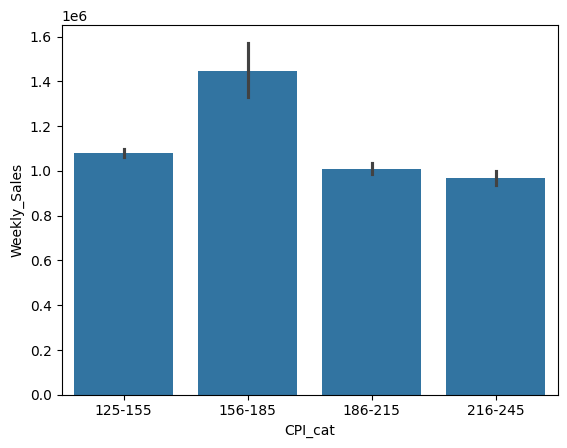

In [37]:
sns.barplot(x=df['CPI_cat'],y=df['Weekly_Sales'])

Yes there is a negative correlationa and the CPI is affecting the weeky sales we can see that in the above graph

Top performing stores according to the historical data.

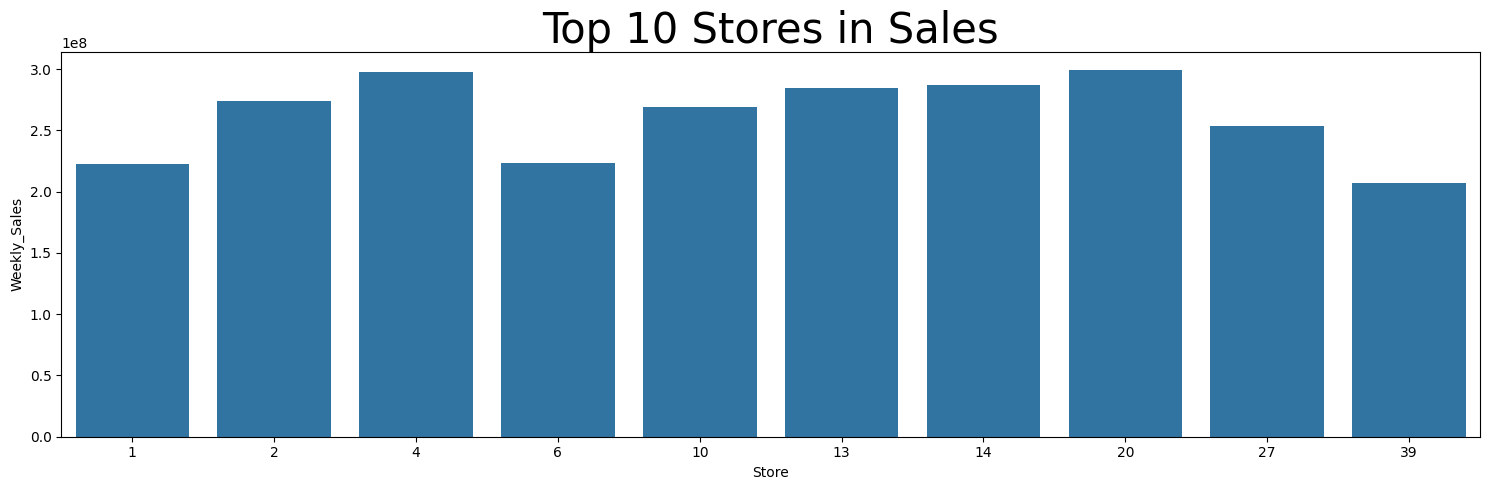

In [38]:
plt.figure(figsize=(15,5))
sns.barplot(x='Store',y='Weekly_Sales',data=top_10)
plt.title('Top 10 Stores in Sales',fontsize=30)
plt.xlabel('Store')
plt.ylabel('Weekly_Sales')
plt.tight_layout()
plt.show()

From the above graph we can see that the stores 4,20,14,13,10 are the Top performing stores among the TOP 10


The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [39]:
store_sales = df.groupby('Store')['Weekly_Sales'].sum()

worst_store = store_sales.idxmin()
best_store = store_sales.idxmax()

worst_sales = store_sales[worst_store]
best_sales = store_sales[best_store]

sales_difference = best_sales - worst_sales

relative_difference = (sales_difference / best_sales) * 100

print(f"Worst performing store: Store {worst_store}")
print(f"Best performing store: Store {best_store}")
print(f"Difference in total sales: {sales_difference}")
print(f"Relative difference: {relative_difference:.2f}%")

Worst performing store: Store 33
Best performing store: Store 20
Difference in total sales: 261906113.29749998
Relative difference: 87.57%


**Use predictive modeling techniques to forecast the sales for each store for the next 12 weeks.**

In [62]:
df_stores_sales =df.groupby('Date')['Weekly_Sales'].sum().reset_index()

In [63]:
df_stores_sales.set_index('Date',inplace=True)

In [64]:
def adf_test(series, title=''):

    print('Augmented Dickey-Fuller Test: {}'.format(title))
    result = adfuller(series,autolag='AIC')
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out['critical value ({})'.format(key)]=val


    print(out.to_string())

    if result[1] <= 0.05:

        print("Rejects the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary.")

In [65]:
adf_test(df_stores_sales['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic     -6.117153e+00
p-value                 9.036826e-08
# lags used             4.000000e+00
# observations          1.380000e+02
critical value (1%)    -3.478648e+00
critical value (5%)    -2.882722e+00
critical value (10%)   -2.578065e+00
Rejects the null hypothesis
Data has no unit root and is stationary


Figure(640x480)


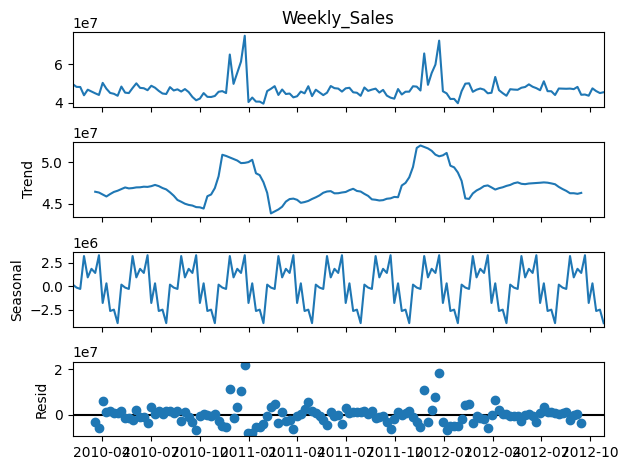

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(df_stores_sales['Weekly_Sales'],period=13)
print(decomposition.plot())

Store - 5

In [86]:
store1_sales=df[df['Store']==5].groupby('Date')['Weekly_Sales'].sum().reset_index()
store1_sales.set_index('Date',inplace=True)
adf_test(store1_sales['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic       -4.310974
p-value                   0.000425
# lags used               4.000000
# observations          138.000000
critical value (1%)      -3.478648
critical value (5%)      -2.882722
critical value (10%)     -2.578065
Rejects the null hypothesis
Data has no unit root and is stationary


In [69]:
decomposition=seasonal_decompose(store1_sales['Weekly_Sales'],period=13)

Figure(640x480)


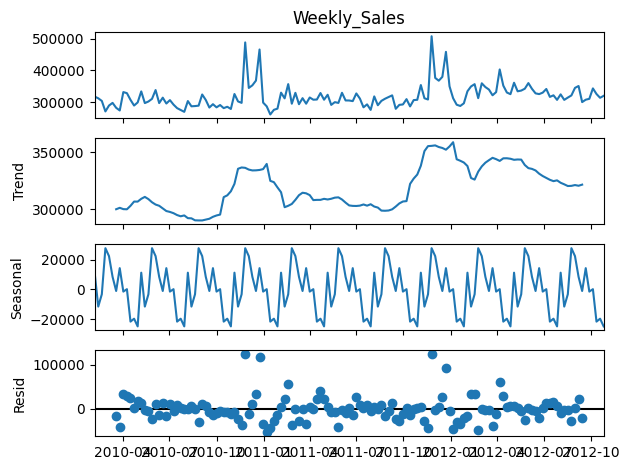

In [85]:
print(decomposition.plot())



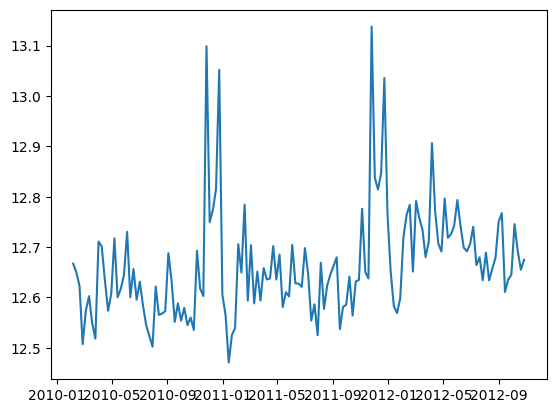

In [71]:
df_log = np.log(store1_sales)
plt.plot(df_log)

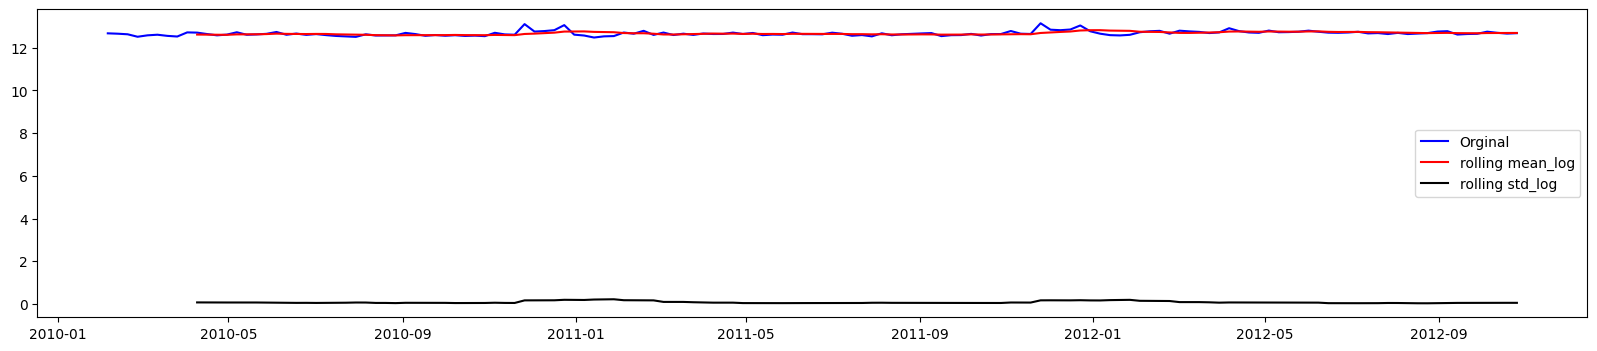

In [72]:
mean_log = df_log.rolling(window = 10).mean()
std_log = df_log.rolling(window = 10).std()
plt.figure(figsize=(20,4))
plt.plot(df_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend(loc = 'best')
plt.show()

In [73]:
df_new = df_log - mean_log
df_new.head(20)

Weekly_Sales
Date                    
2010-02-05           NaN
2010-02-12           NaN
2010-02-19           NaN
2010-02-26           NaN
2010-03-05           NaN
2010-03-12           NaN
2010-03-19           NaN
2010-03-26           NaN
2010-04-02           NaN
2010-04-09      0.090575
2010-04-16      0.027193
2010-04-23     -0.025665
2010-04-30      0.009473
2010-05-07      0.098726
2010-05-14     -0.021022
2010-05-21     -0.005945
2010-05-28      0.011941
2010-06-04      0.076655
2010-06-11     -0.042268
2010-06-18      0.018382

In [75]:

df_new.dropna(inplace = True)

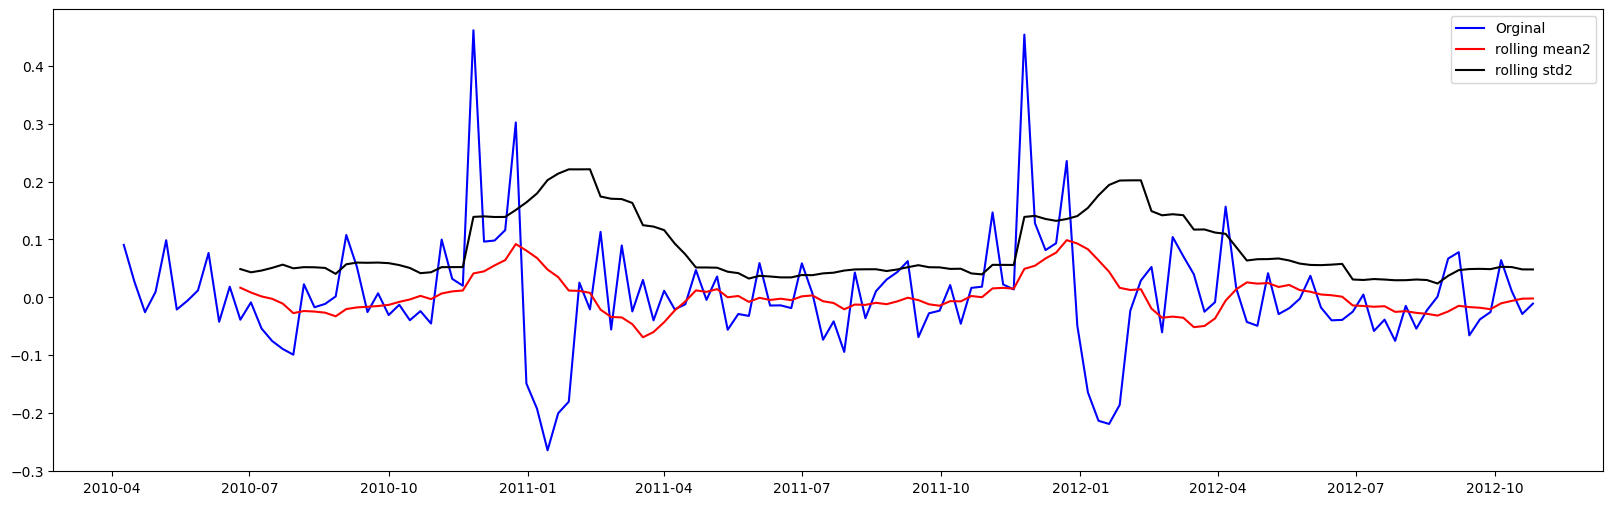

In [76]:
mean2 = df_new.rolling(window = 12).mean()
std2 = df_new.rolling(window = 12).std()

plt.figure(figsize=(20,6))
plt.plot(df_new,color= 'blue',label = 'Orginal')
plt.plot(mean2, color = 'red', label = 'rolling mean2')
plt.plot(std2, color = 'black', label = 'rolling std2')
plt.legend(loc = 'best')
plt.show()

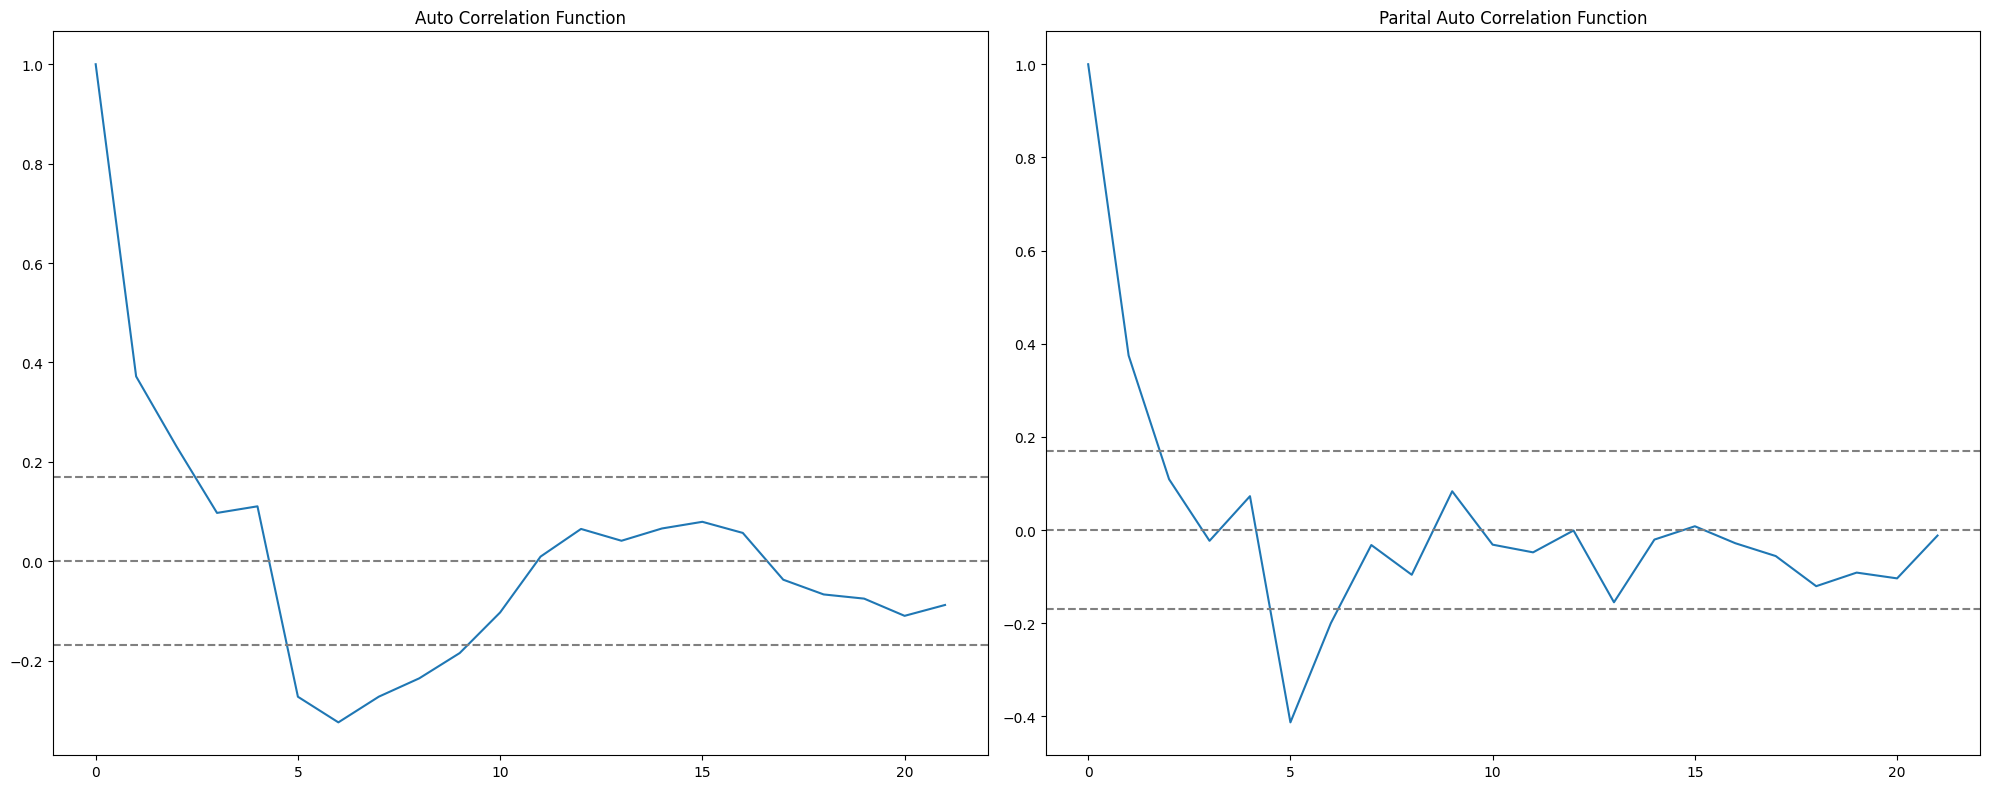

In [78]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(df_new)
lag_pacf=pacf(df_new)

plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Auto Correlation Function')
plt.tight_layout()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Parital Auto Correlation Function')
plt.tight_layout()

In [79]:
p, d, q = 1, 1, 1
model = ARIMA(df_new, order=(p, d, q))
arima_result = model.fit()

predictions = arima_result.predict()

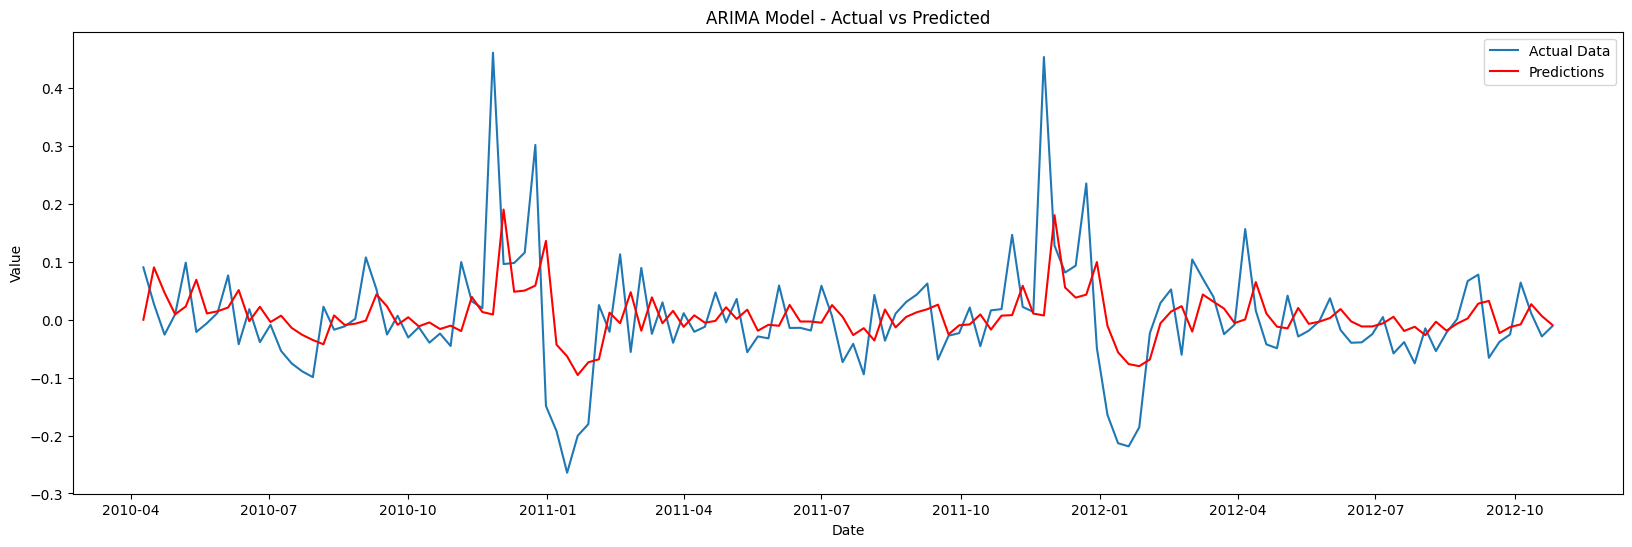

In [80]:
plt.figure(figsize=(20,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [81]:
forecast_steps = 12
forecast = arima_result.forecast(steps=forecast_steps)

end_date_actual_data = '2012-12-10'


forecast_start_date = pd.to_datetime(end_date_actual_data) + pd.DateOffset(weeks=0)
forecast_end_date = forecast_start_date + pd.DateOffset(weeks=len(forecast))
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='W')

In [82]:
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sales': forecast})
forecast_df.set_index('Date',inplace=True)

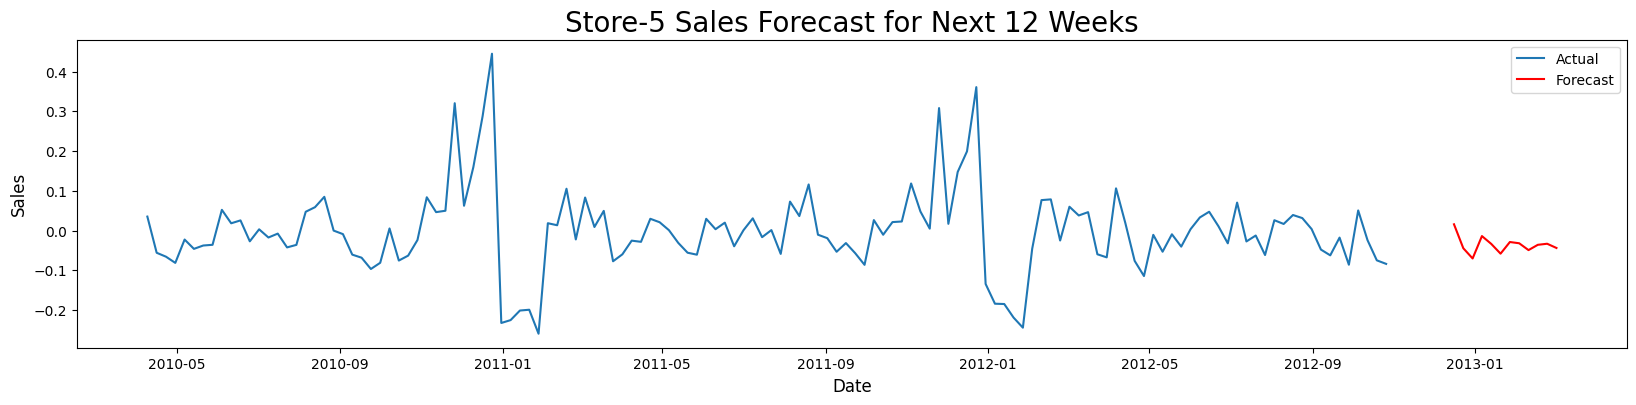

In [176]:
plt.figure(figsize=(20, 4))
plt.plot(df_new, label='Actual')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('Store-5 Sales Forecast for Next 12 Weeks',fontsize=20)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.legend()
plt.show()

In [84]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df_new,predictions)
print(f'Mean Squared_Error  {mse}')

rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error  {rmse}')

Mean Squared_Error  0.008477799277490145
Root Mean Squared_Error  0.0920749655307573


Store - 20

In [112]:
store2_sales=df[df['Store']==20].groupby('Date')['Weekly_Sales'].sum().reset_index()
store2_sales.set_index('Date',inplace=True)
adf_test(store1_sales['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic       -4.310974
p-value                   0.000425
# lags used               4.000000
# observations          138.000000
critical value (1%)      -3.478648
critical value (5%)      -2.882722
critical value (10%)     -2.578065
Rejects the null hypothesis
Data has no unit root and is stationary


In [90]:
decomposition=seasonal_decompose(store2_sales['Weekly_Sales'],period=13)

Figure(640x480)


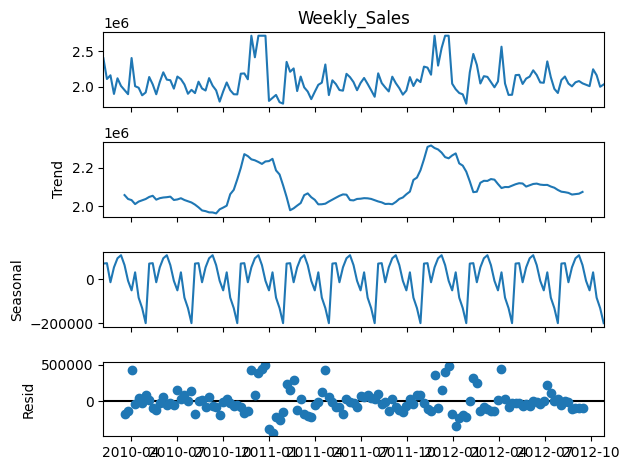

In [91]:
print(decomposition.plot())



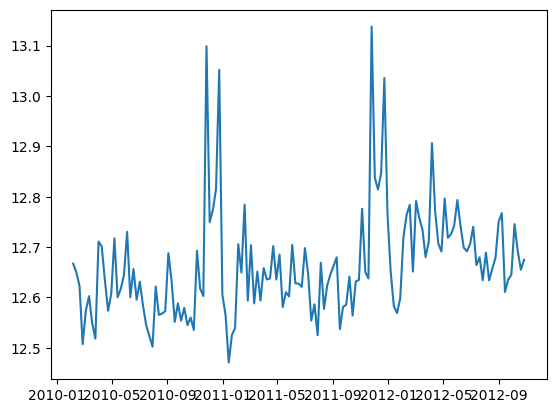

In [92]:
df_log = np.log(store1_sales)
plt.plot(df_log)

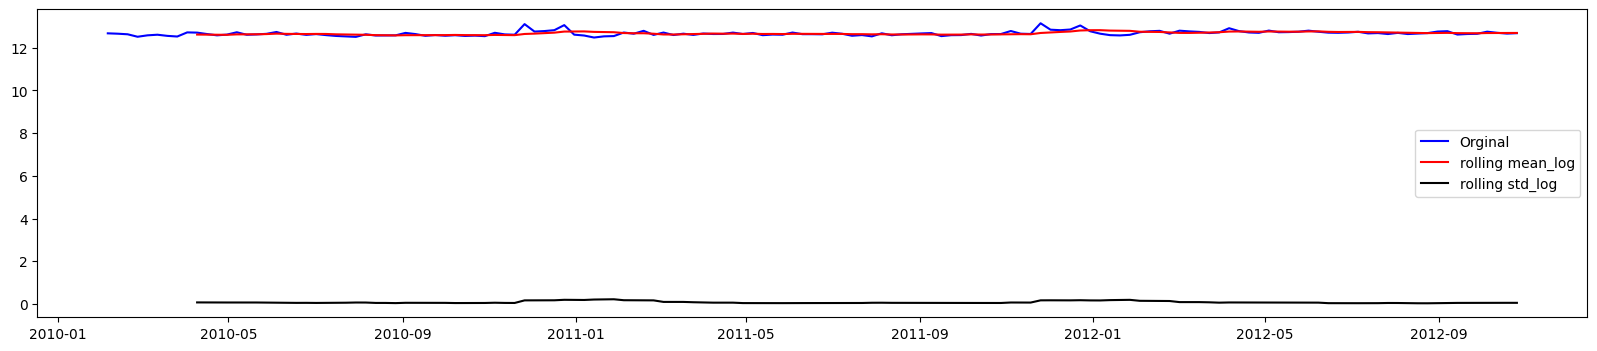

In [93]:
mean_log = df_log.rolling(window = 10).mean()
std_log = df_log.rolling(window = 10).std()
plt.figure(figsize=(20,4))
plt.plot(df_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend(loc = 'best')
plt.show()

In [94]:
df_new = df_log - mean_log
df_new.head(20)

Weekly_Sales
Date                    
2010-02-05           NaN
2010-02-12           NaN
2010-02-19           NaN
2010-02-26           NaN
2010-03-05           NaN
2010-03-12           NaN
2010-03-19           NaN
2010-03-26           NaN
2010-04-02           NaN
2010-04-09      0.090575
2010-04-16      0.027193
2010-04-23     -0.025665
2010-04-30      0.009473
2010-05-07      0.098726
2010-05-14     -0.021022
2010-05-21     -0.005945
2010-05-28      0.011941
2010-06-04      0.076655
2010-06-11     -0.042268
2010-06-18      0.018382

In [95]:

df_new.dropna(inplace = True)

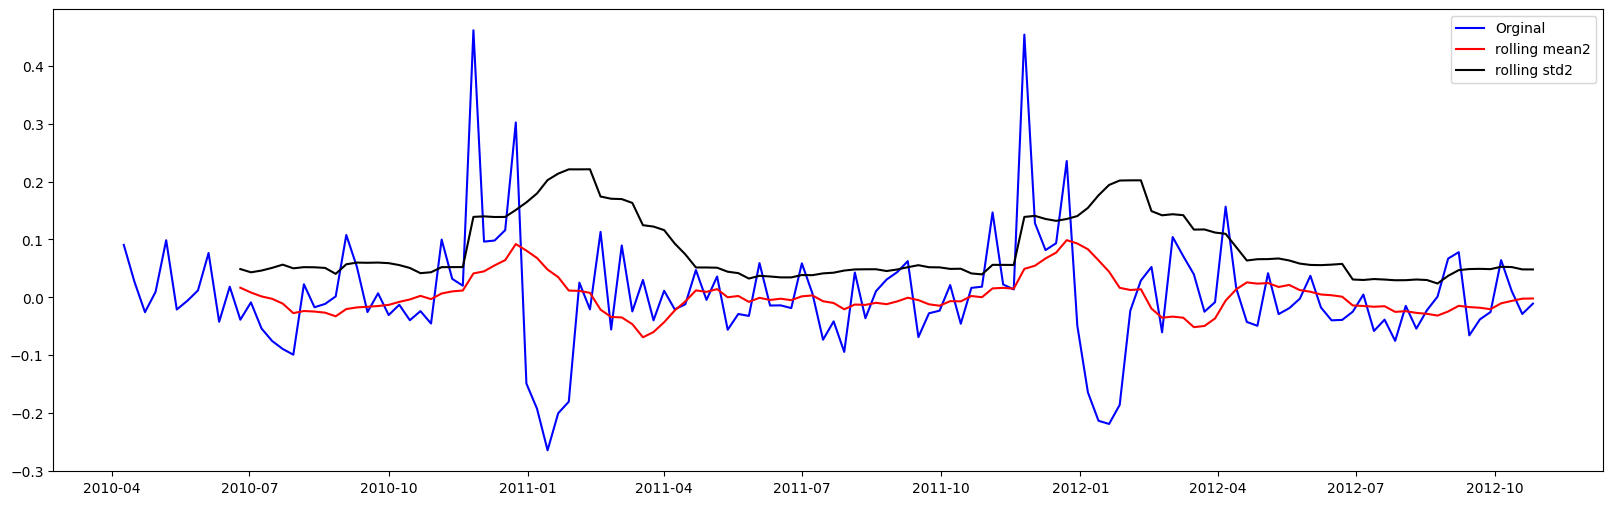

In [96]:
mean2 = df_new.rolling(window = 12).mean()
std2 = df_new.rolling(window = 12).std()

plt.figure(figsize=(20,6))
plt.plot(df_new,color= 'blue',label = 'Orginal')
plt.plot(mean2, color = 'red', label = 'rolling mean2')
plt.plot(std2, color = 'black', label = 'rolling std2')
plt.legend(loc = 'best')
plt.show()

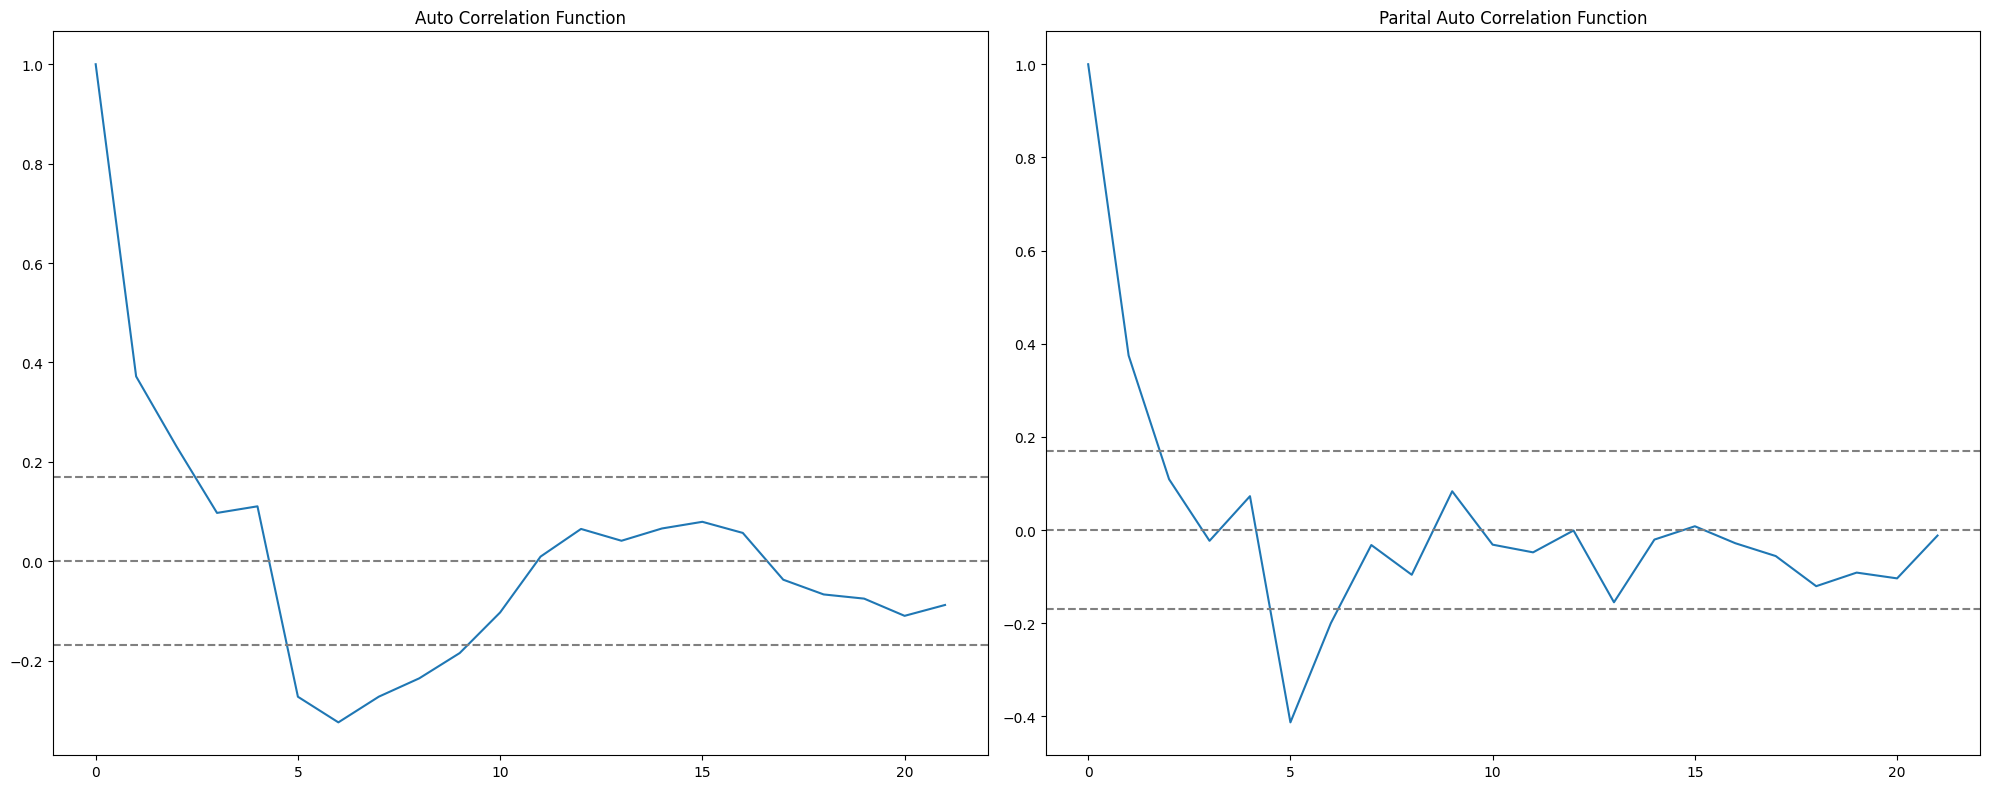

In [97]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(df_new)
lag_pacf=pacf(df_new)

plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Auto Correlation Function')
plt.tight_layout()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Parital Auto Correlation Function')
plt.tight_layout()

In [104]:
p, d, q = 4, 1, 3
model = ARIMA(df_new, order=(p, d, q))
arima_result = model.fit()

predictions = arima_result.predict()

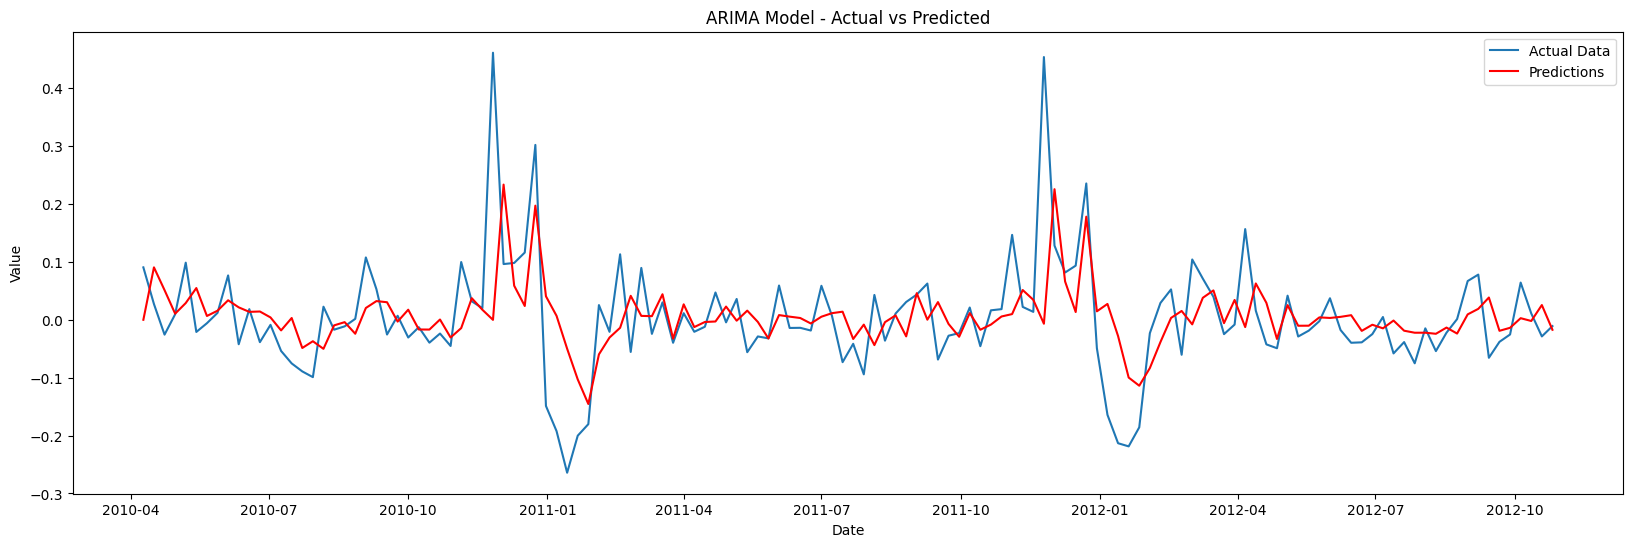

In [105]:
plt.figure(figsize=(20,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [107]:
forecast_steps = 12
forecast = arima_result.forecast(steps=forecast_steps)

end_date_actual_data = '2012-12-10'


forecast_start_date = pd.to_datetime(end_date_actual_data) + pd.DateOffset(weeks=0)
forecast_end_date = forecast_start_date + pd.DateOffset(weeks=len(forecast))
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='W')

In [108]:
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sales': forecast})
forecast_df.set_index('Date',inplace=True)

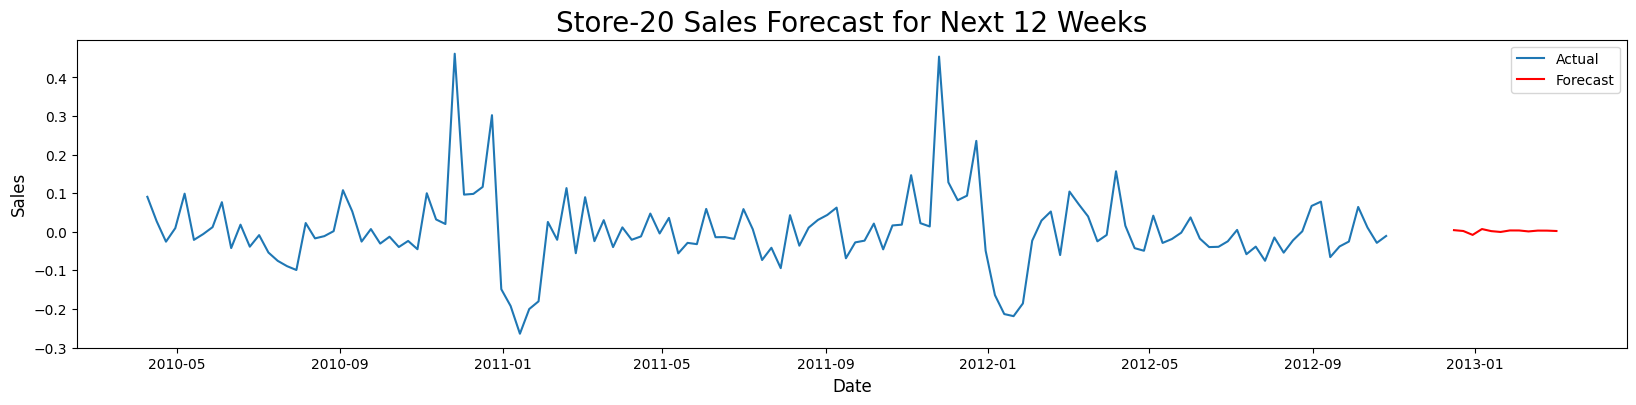

In [109]:
plt.figure(figsize=(20, 4))
plt.plot(df_new, label='Actual')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('Store-20 Sales Forecast for Next 12 Weeks',fontsize=20)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.legend()
plt.show()

In [110]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df_new,predictions)
print(f'Mean Squared_Error  {mse}')

rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error  {rmse}')

Mean Squared_Error  0.007645894112161513
Root Mean Squared_Error  0.08744080347390178


Store - 14

In [113]:
store3_sales=df[df['Store']==14].groupby('Date')['Weekly_Sales'].sum().reset_index()
store3_sales.set_index('Date',inplace=True)
adf_test(store1_sales['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic       -4.310974
p-value                   0.000425
# lags used               4.000000
# observations          138.000000
critical value (1%)      -3.478648
critical value (5%)      -2.882722
critical value (10%)     -2.578065
Rejects the null hypothesis
Data has no unit root and is stationary


In [114]:
decomposition=seasonal_decompose(store3_sales['Weekly_Sales'],period=13)

Figure(640x480)


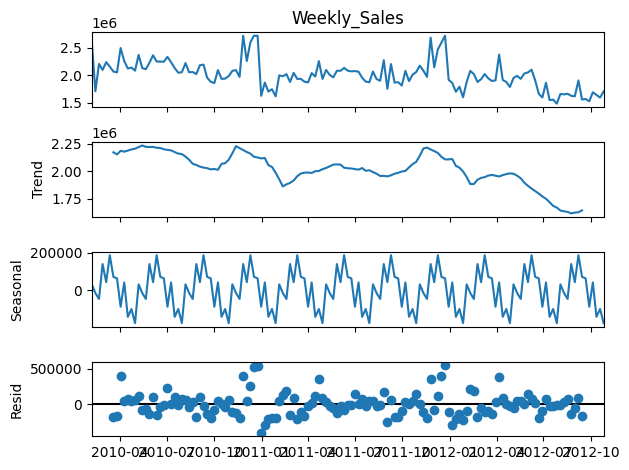

In [115]:
print(decomposition.plot())



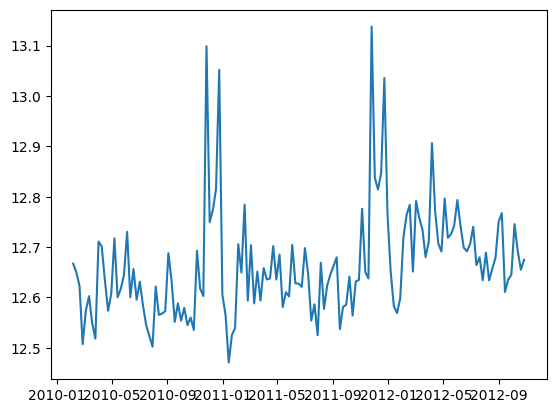

In [116]:
df_log = np.log(store1_sales)
plt.plot(df_log)

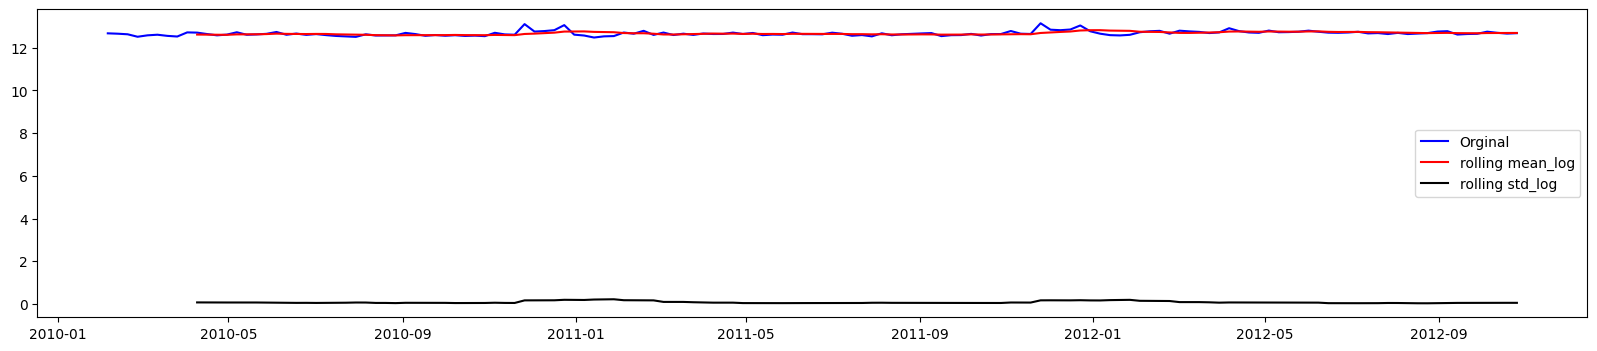

In [117]:
mean_log = df_log.rolling(window = 10).mean()
std_log = df_log.rolling(window = 10).std()
plt.figure(figsize=(20,4))
plt.plot(df_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend(loc = 'best')
plt.show()

In [118]:
df_new = df_log - mean_log
df_new.head(20)

Weekly_Sales
Date                    
2010-02-05           NaN
2010-02-12           NaN
2010-02-19           NaN
2010-02-26           NaN
2010-03-05           NaN
2010-03-12           NaN
2010-03-19           NaN
2010-03-26           NaN
2010-04-02           NaN
2010-04-09      0.090575
2010-04-16      0.027193
2010-04-23     -0.025665
2010-04-30      0.009473
2010-05-07      0.098726
2010-05-14     -0.021022
2010-05-21     -0.005945
2010-05-28      0.011941
2010-06-04      0.076655
2010-06-11     -0.042268
2010-06-18      0.018382

In [119]:

df_new.dropna(inplace = True)

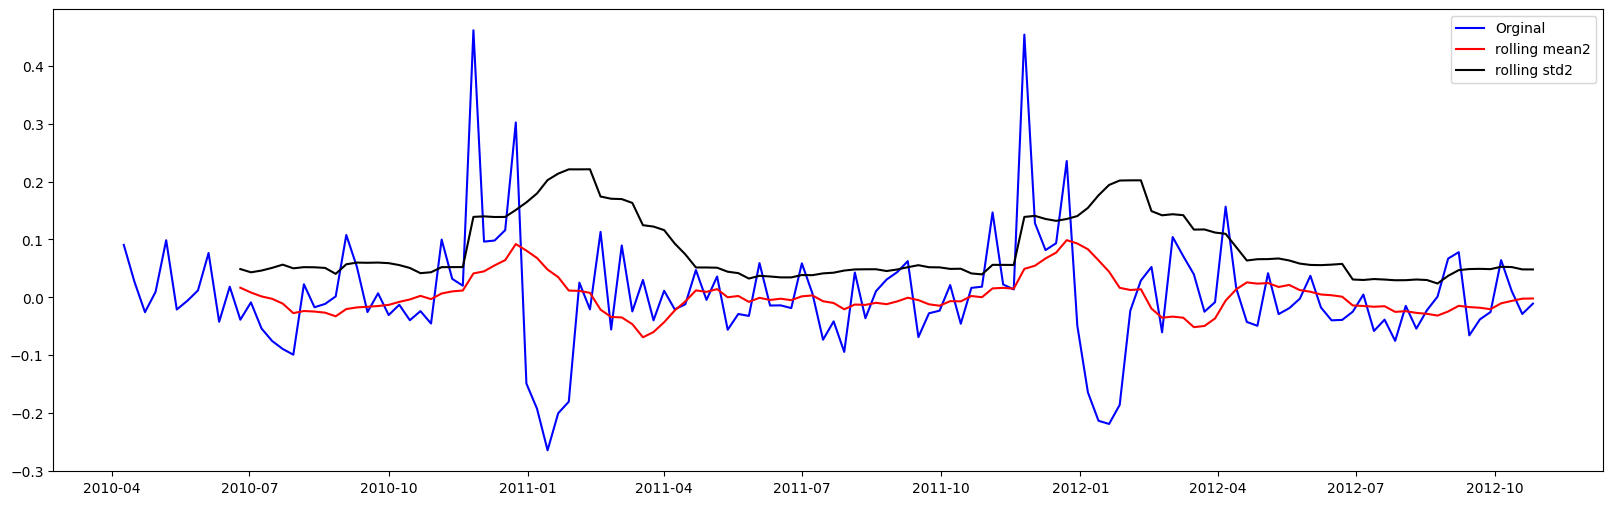

In [120]:
mean2 = df_new.rolling(window = 12).mean()
std2 = df_new.rolling(window = 12).std()

plt.figure(figsize=(20,6))
plt.plot(df_new,color= 'blue',label = 'Orginal')
plt.plot(mean2, color = 'red', label = 'rolling mean2')
plt.plot(std2, color = 'black', label = 'rolling std2')
plt.legend(loc = 'best')
plt.show()

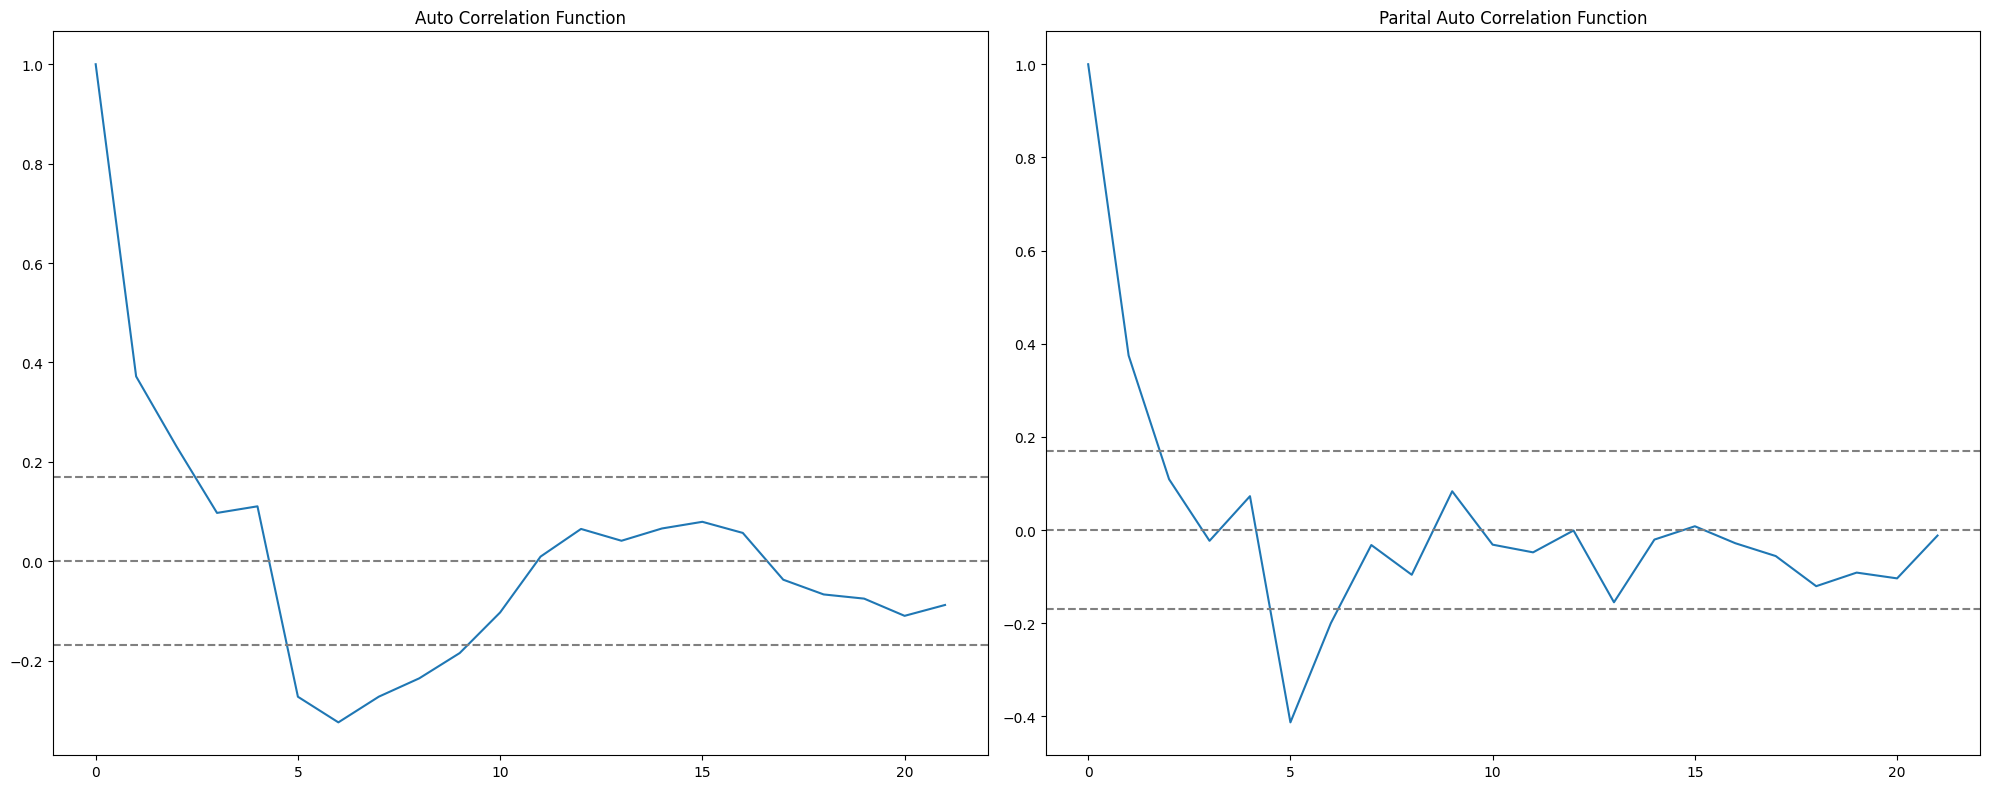

In [121]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(df_new)
lag_pacf=pacf(df_new)

plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Auto Correlation Function')
plt.tight_layout()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Parital Auto Correlation Function')
plt.tight_layout()

In [135]:
p, d, q = 2, 1, 3
model = ARIMA(df_new, order=(p, d, q))
arima_result = model.fit()

predictions = arima_result.predict()

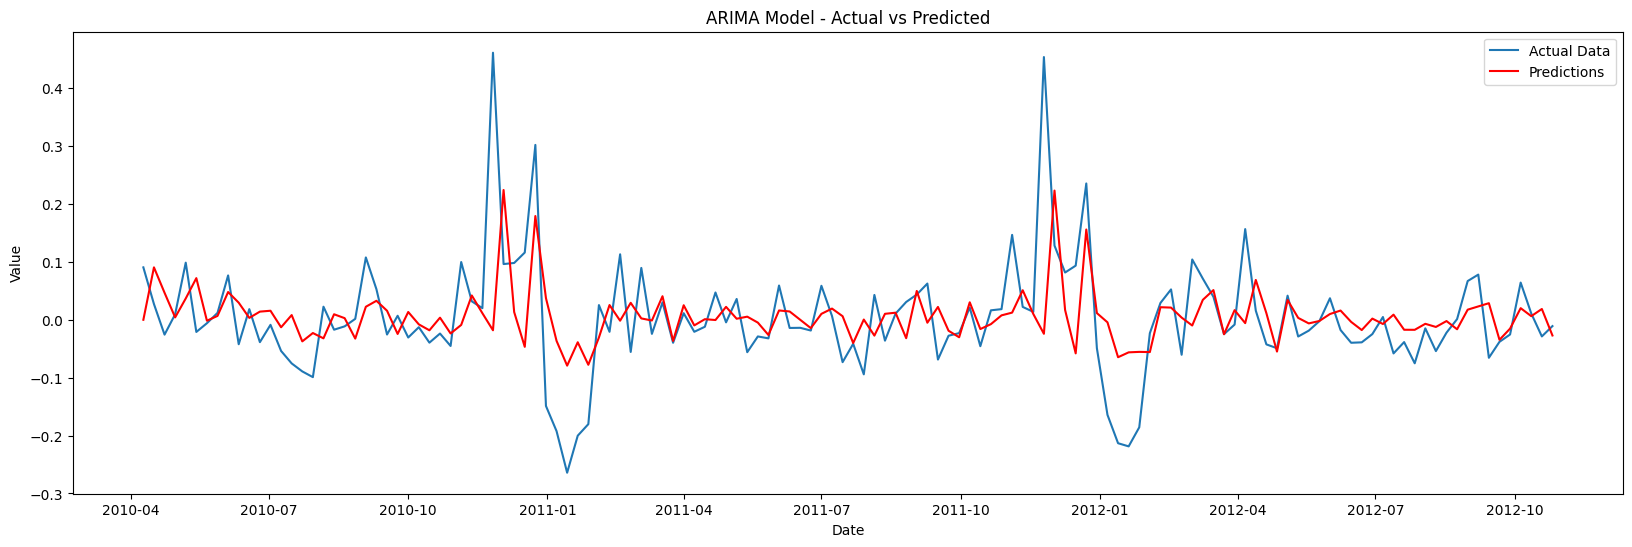

In [136]:
plt.figure(figsize=(20,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [137]:
forecast_steps = 12
forecast = arima_result.forecast(steps=forecast_steps)

end_date_actual_data = '2012-12-10'


forecast_start_date = pd.to_datetime(end_date_actual_data) + pd.DateOffset(weeks=0)
forecast_end_date = forecast_start_date + pd.DateOffset(weeks=len(forecast))
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='W')

In [139]:
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sales': forecast})
forecast_df.set_index('Date',inplace=True)

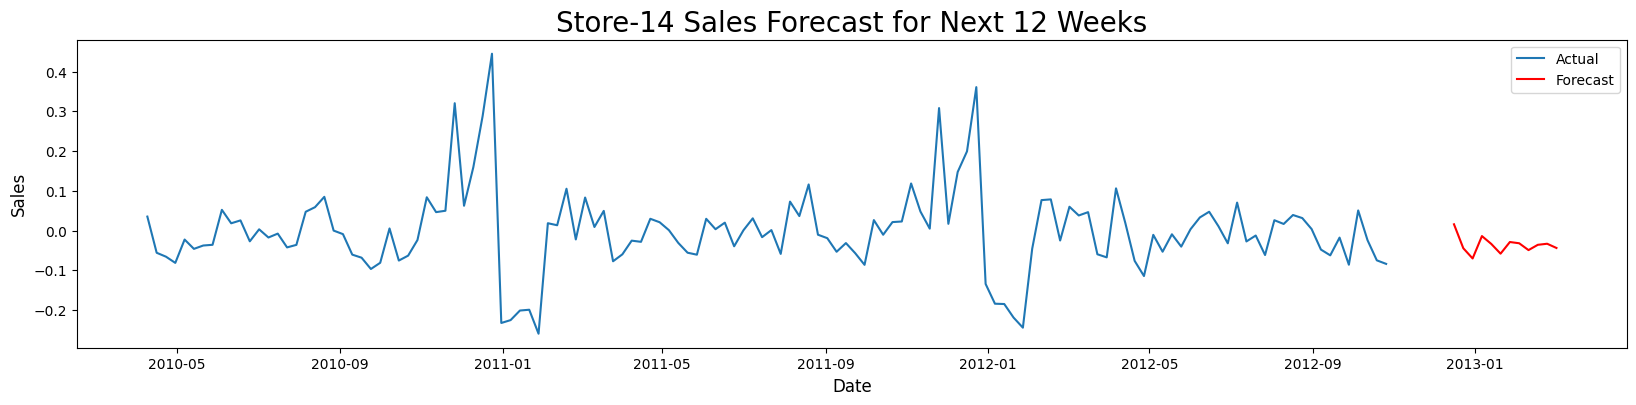

In [177]:
plt.figure(figsize=(20, 4))
plt.plot(df_new, label='Actual')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('Store-14 Sales Forecast for Next 12 Weeks',fontsize=20)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.legend()
plt.show()

In [141]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df_new,predictions)
print(f'Mean Squared_Error  {mse}')

rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error  {rmse}')

Mean Squared_Error  0.008028137098456864
Root Mean Squared_Error  0.08959987220111904


Store - 11

In [150]:

store11_sales=df[df['Store']==11].groupby('Date')['Weekly_Sales'].sum().reset_index()

In [151]:
store11_sales.set_index('Date',inplace=True) # Setting the date as index

In [152]:
adf_test(store11_sales['Weekly_Sales'],title='ADF TEST') # Checking the pvalue and data stationarity

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic       -3.762354
p-value                   0.003317
# lags used               6.000000
# observations          136.000000
critical value (1%)      -3.479372
critical value (5%)      -2.883037
critical value (10%)     -2.578234
Rejects the null hypothesis
Data has no unit root and is stationary


In [153]:
decomposition=seasonal_decompose(store11_sales['Weekly_Sales'],period=13)# plotting the components of time series data

Figure(640x480)


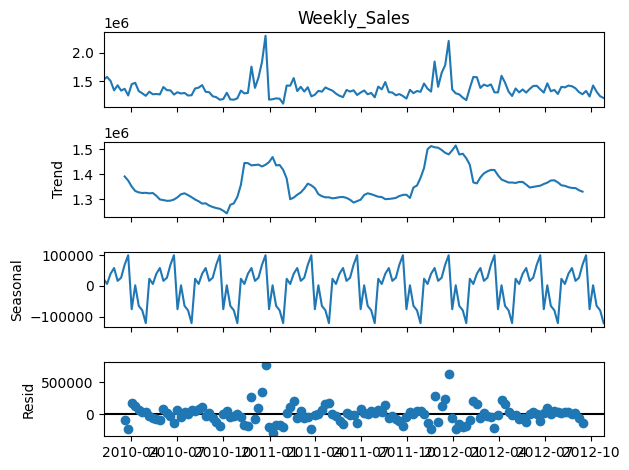

In [154]:
print(decomposition.plot())

In [155]:
mean1=store11_sales.rolling(window=10).mean()
std1=store11_sales.rolling(window=10).std()

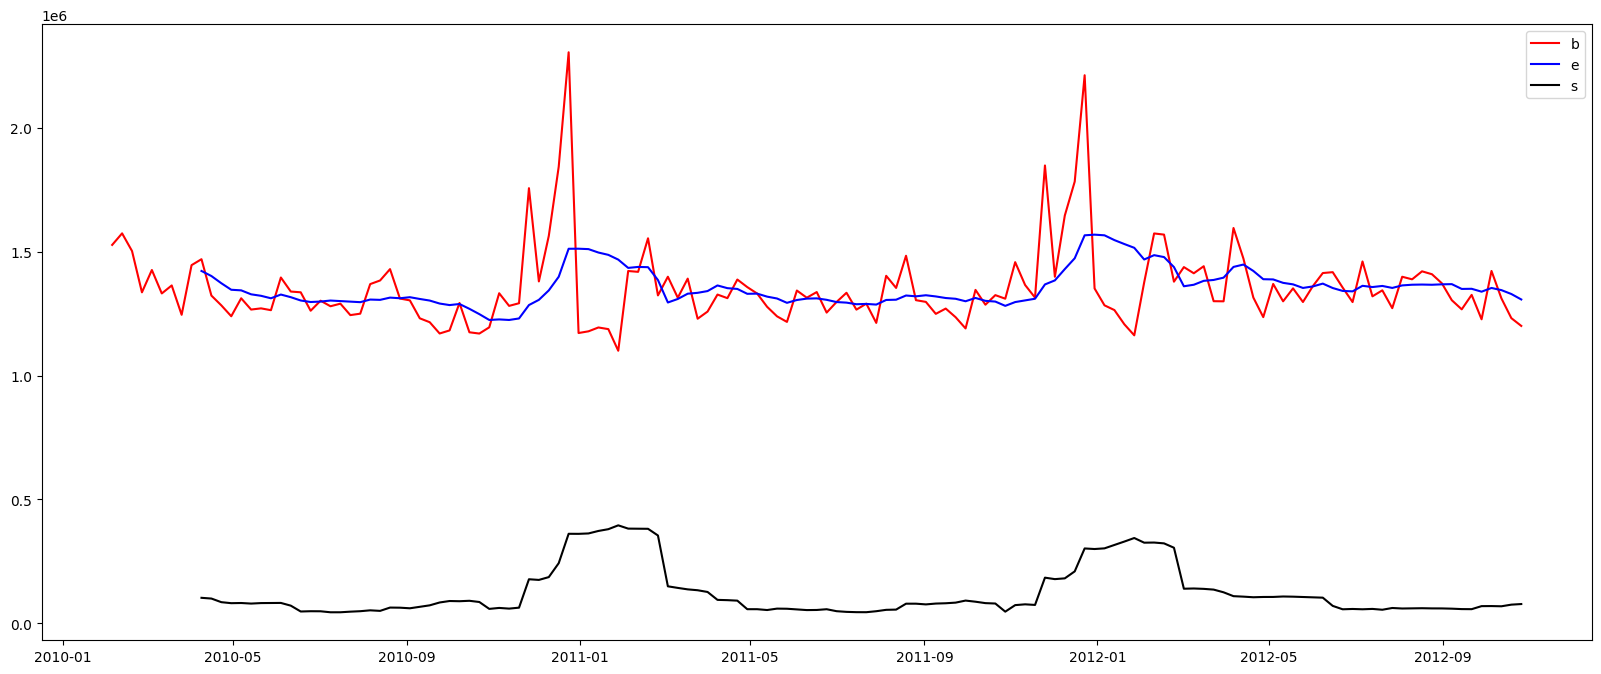

In [156]:

plt.figure(figsize=(20,8))
orig=plt.plot(store11_sales['Weekly_Sales'],color='red',label='Original')
mean=plt.plot(mean1,color='blue',label='Rolling Mean')
std=plt.plot(std1,color='black',label='Rolling Std')
plt.legend('best')
plt.show(block=False)

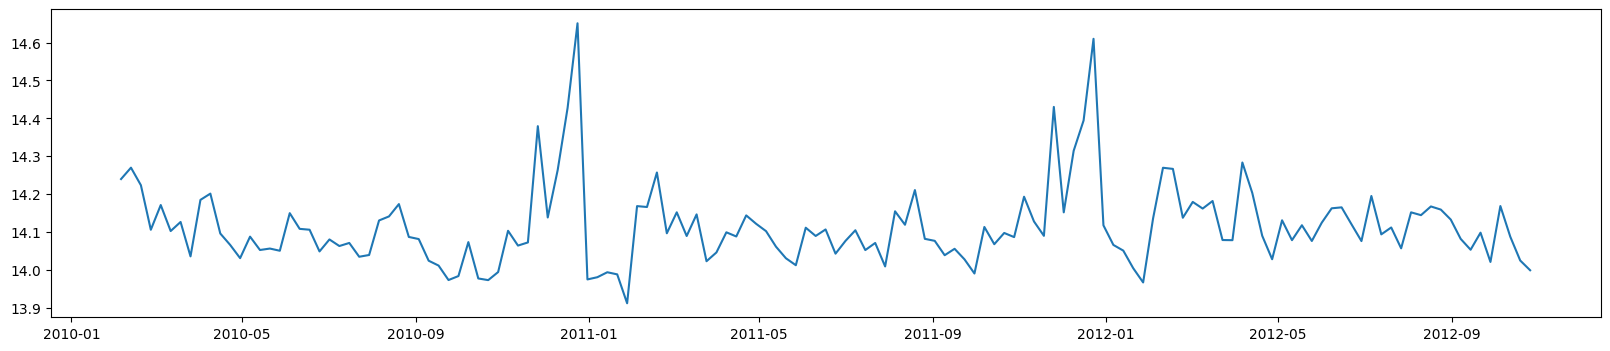

In [157]:
df_log = np.log(store11_sales)
plt.figure(figsize=(20,4))
plt.plot(df_log)

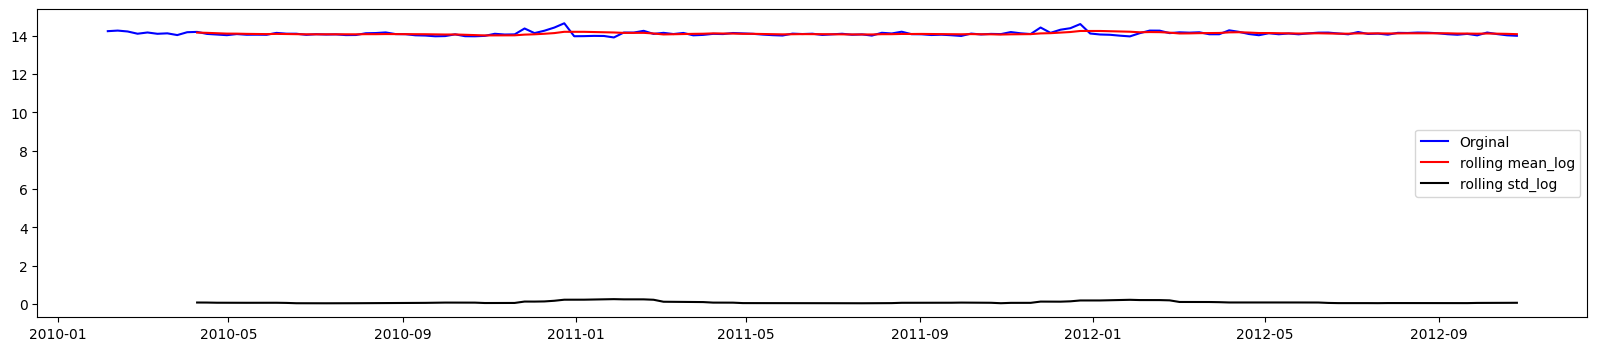

In [158]:

mean_log = df_log.rolling(window = 10).mean()
std_log = df_log.rolling(window = 10).std()
plt.figure(figsize=(20,4))
plt.plot(df_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend(loc = 'best')
plt.show()

In [159]:

df_new = df_log - mean_log
df_new.head(20)

Weekly_Sales
Date                    
2010-02-05           NaN
2010-02-12           NaN
2010-02-19           NaN
2010-02-26           NaN
2010-03-05           NaN
2010-03-12           NaN
2010-03-19           NaN
2010-03-26           NaN
2010-04-02           NaN
2010-04-09      0.035252
2010-04-16     -0.055746
2010-04-23     -0.065608
2010-04-30     -0.081209
2010-05-07     -0.022510
2010-05-14     -0.045942
2010-05-21     -0.037492
2010-05-28     -0.035700
2010-06-04      0.052225
2010-06-11      0.018392
2010-06-18      0.025654

In [160]:
df_new.dropna(inplace = True) # dropping the nan values

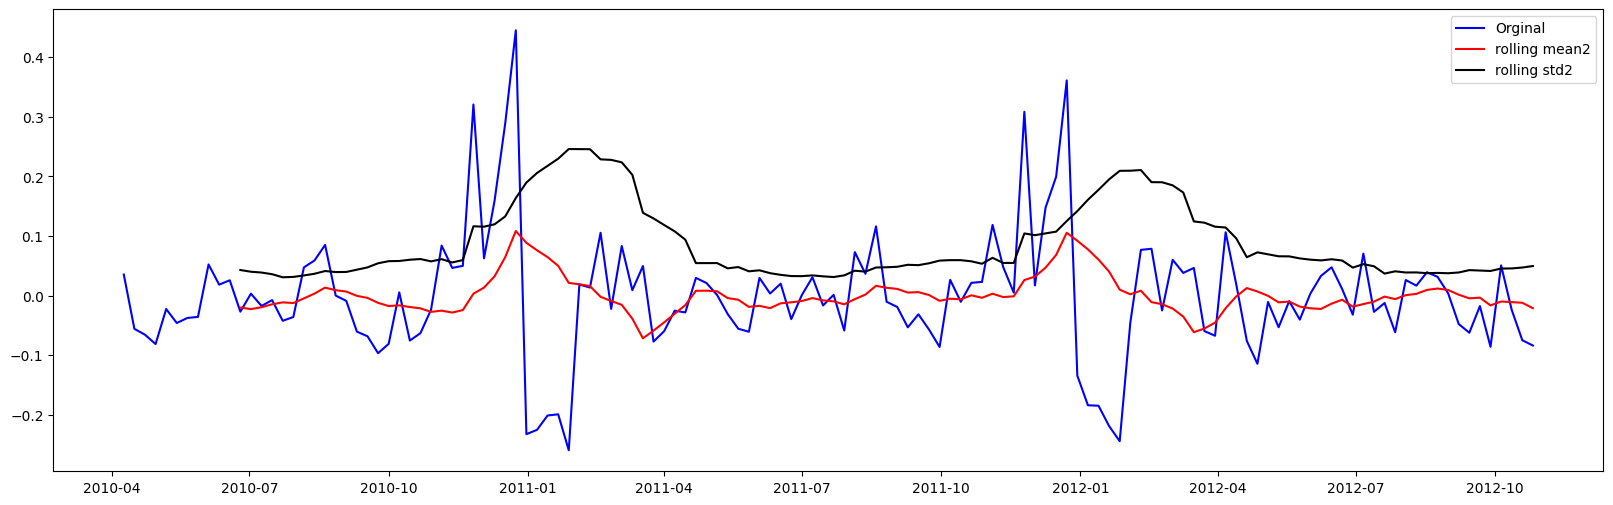

In [161]:
# after the log transformation checking rolling stastics such as mean and standard deviation
mean2 = df_new.rolling(window = 12).mean()
std2 = df_new.rolling(window = 12).std()

plt.figure(figsize=(20,6))
plt.plot(df_new,color= 'blue',label = 'Orginal')
plt.plot(mean2, color = 'red', label = 'rolling mean2')
plt.plot(std2, color = 'black', label = 'rolling std2')
plt.legend(loc = 'best')
plt.show()

In [162]:
adf_test(df_new['Weekly_Sales'],title='ADF TEST') # Checking the Data stationarity again after the log transformation

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic       -4.633134
p-value                   0.000112
# lags used              12.000000
# observations          121.000000
critical value (1%)      -3.485585
critical value (5%)      -2.885739
critical value (10%)     -2.579676
Rejects the null hypothesis
Data has no unit root and is stationary


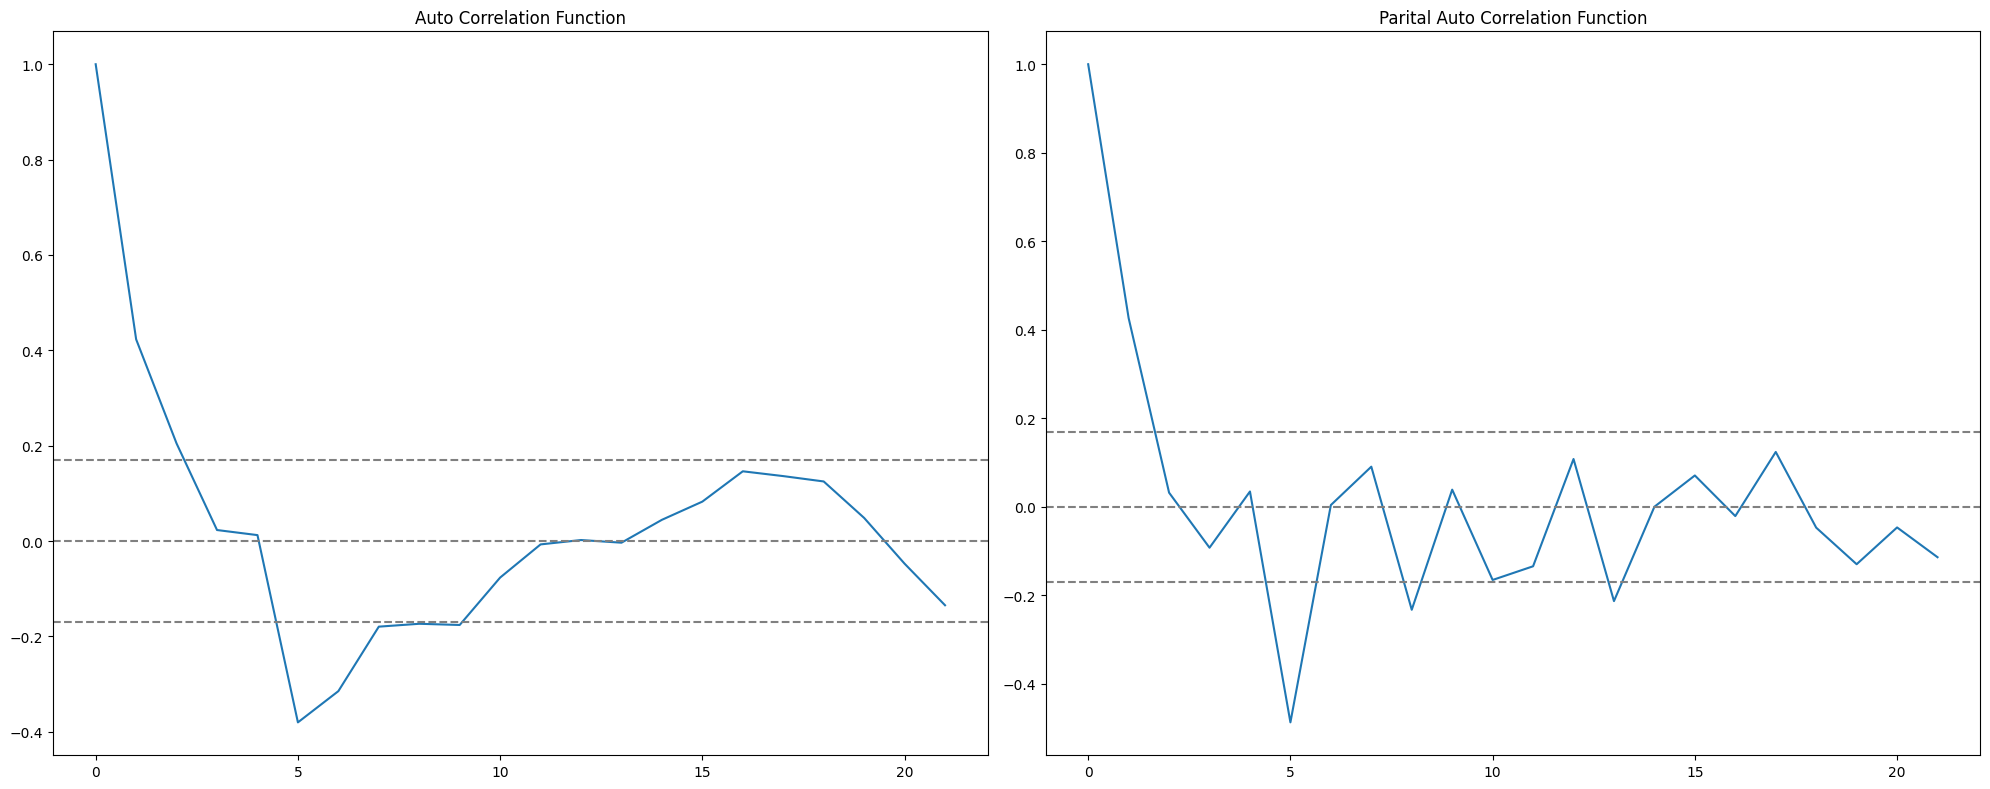

In [163]:
# plotting the acf and pacf plot to identify the values of P AND Q
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(df_new)
lag_pacf=pacf(df_new)


# Plot ACf
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Auto Correlation Function')
plt.tight_layout()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Parital Auto Correlation Function')
plt.tight_layout()

In [165]:

p, d, q = 3, 1, 2
model = ARIMA(df_new, order=(p, d, q))
arima_result = model.fit()

predictions = arima_result.predict()

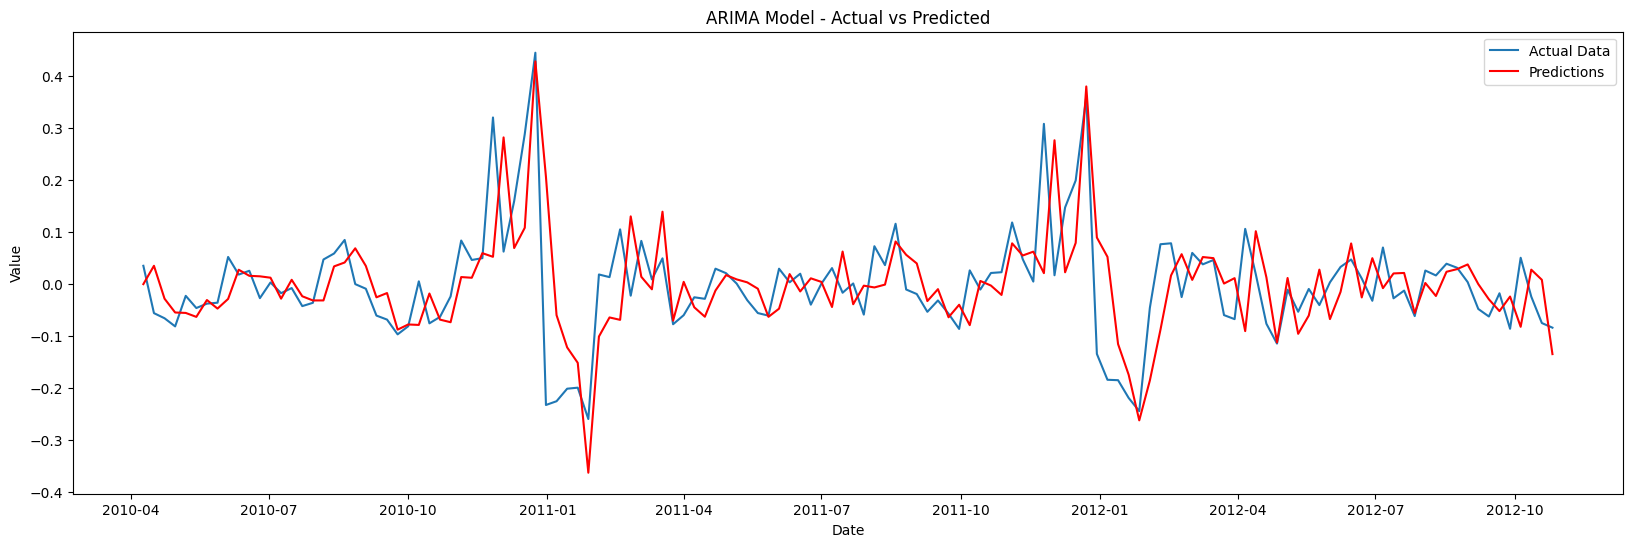

In [166]:

plt.figure(figsize=(20,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [167]:
mse=mean_squared_error(df_new,predictions)
print(f'Mean Squared_Error  {mse}')
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error  {rmse}')
forecast_steps = 12
forecast = arima_result.forecast(steps=forecast_steps)
end_date_actual_data = '2012-12-10'

forecast_start_date = pd.to_datetime(end_date_actual_data) + pd.DateOffset(weeks=0)
forecast_end_date = forecast_start_date + pd.DateOffset(weeks=len(forecast))
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='W')

Mean Squared_Error  0.00833412479846027


In [168]:
rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error  {rmse}')

Root Mean Squared_Error  0.09129142784763677


In [169]:
forecast_steps = 12
forecast = arima_result.forecast(steps=forecast_steps)

In [171]:
end_date_actual_data = '2012-12-10'

forecast_start_date = pd.to_datetime(end_date_actual_data) + pd.DateOffset(weeks=0)
forecast_end_date = forecast_start_date + pd.DateOffset(weeks=len(forecast))
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='W')

In [172]:
# creating a dataframe with forecasted sales and next 12 weeks dates
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sales': forecast})

In [173]:
forecast_df.set_index('Date',inplace=True)

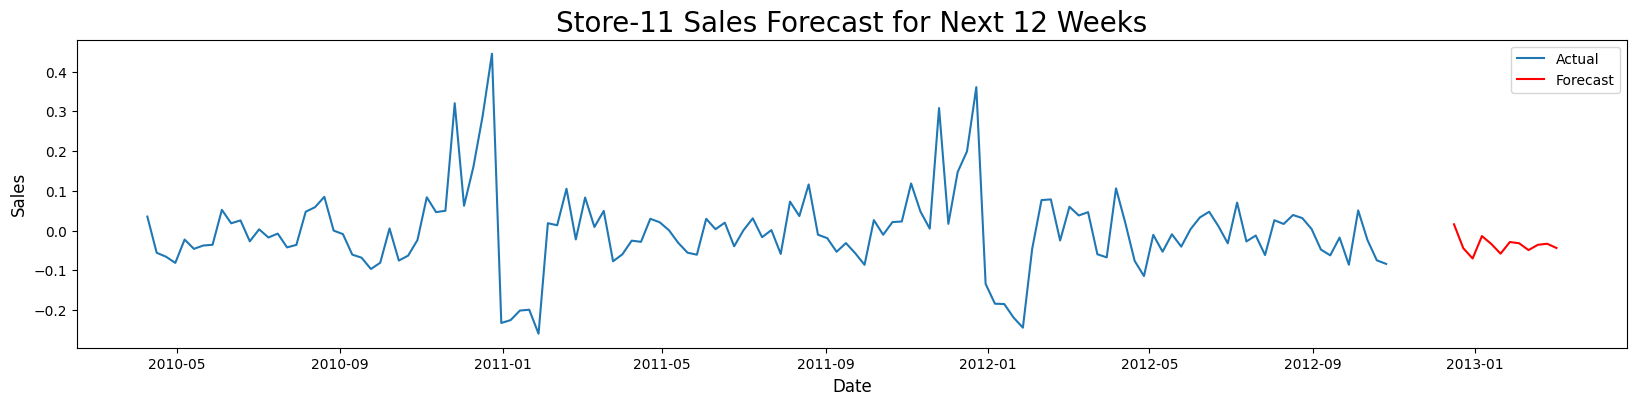

In [174]:
plt.figure(figsize=(20, 4))
plt.plot(df_new, label='Actual')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('Store-11 Sales Forecast for Next 12 Weeks',fontsize=20)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.legend()
plt.show()

In [175]:

rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error {rmse}')

Root Mean Squared_Error 0.09129142784763677


Store - 33

In [178]:

store33_sales=df[df['Store']==33].groupby('Date')['Weekly_Sales'].sum().reset_index()

In [179]:
store33_sales.set_index('Date',inplace=True)

In [180]:
adf_test(store11_sales['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic       -3.762354
p-value                   0.003317
# lags used               6.000000
# observations          136.000000
critical value (1%)      -3.479372
critical value (5%)      -2.883037
critical value (10%)     -2.578234
Rejects the null hypothesis
Data has no unit root and is stationary


In [184]:
decomposition=seasonal_decompose(store33_sales['Weekly_Sales'],period=13)

Figure(640x480)


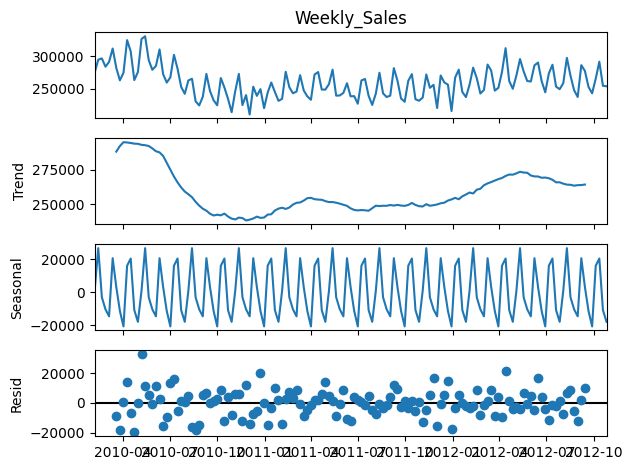

In [185]:
print(decomposition.plot())

In [186]:
mean1=store11_sales.rolling(window=10).mean()
std1=store11_sales.rolling(window=10).std()

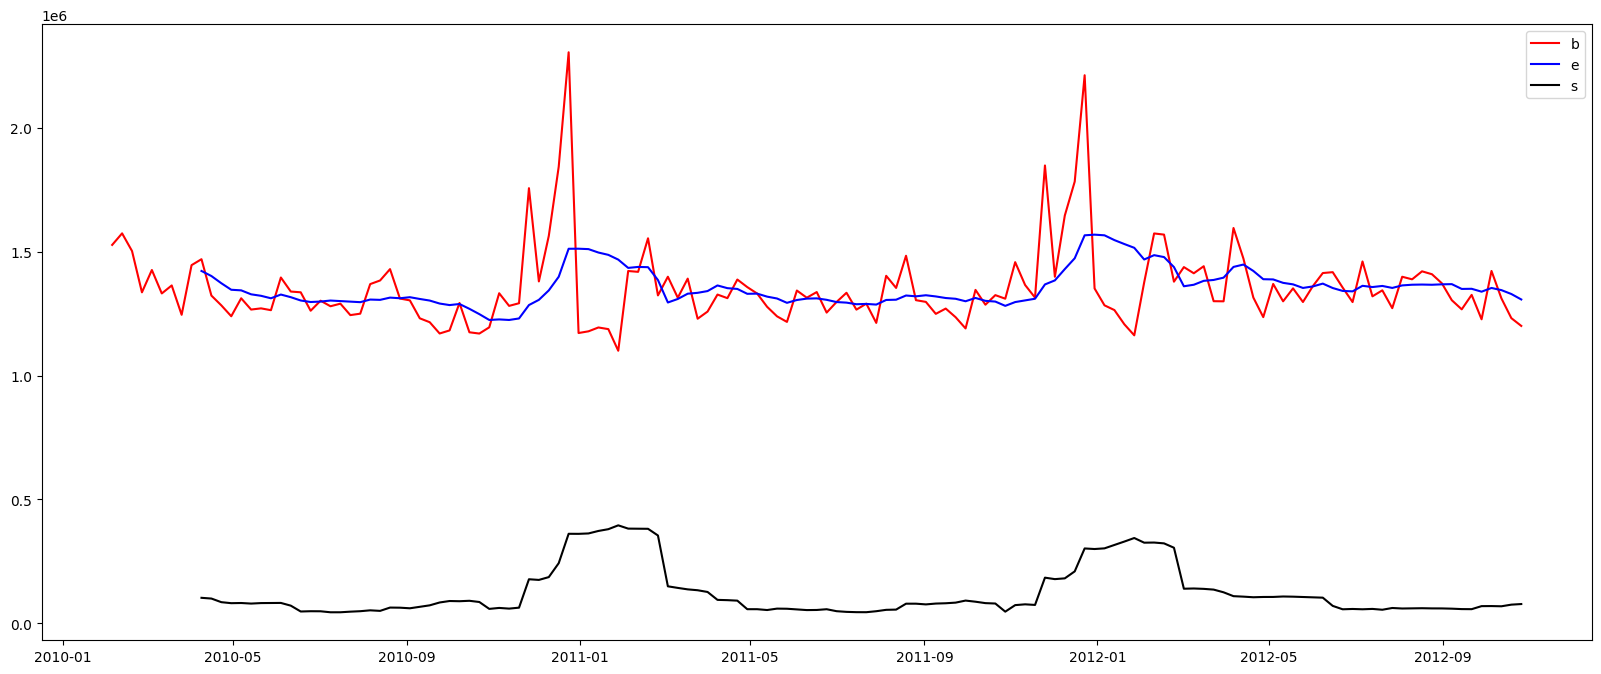

In [187]:
# plotting the rolling mean
plt.figure(figsize=(20,8))
orig=plt.plot(store11_sales['Weekly_Sales'],color='red',label='Original')
mean=plt.plot(mean1,color='blue',label='Rolling Mean')
std=plt.plot(std1,color='black',label='Rolling Std')
plt.legend('best')
plt.show(block=False)

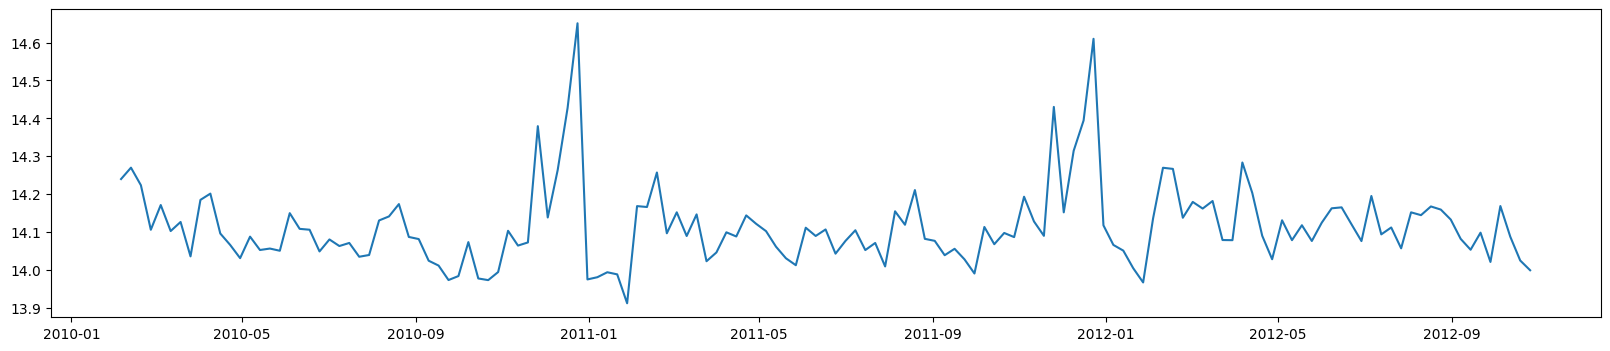

In [188]:
df_log = np.log(store11_sales)
plt.figure(figsize=(20,4))
plt.plot(df_log)

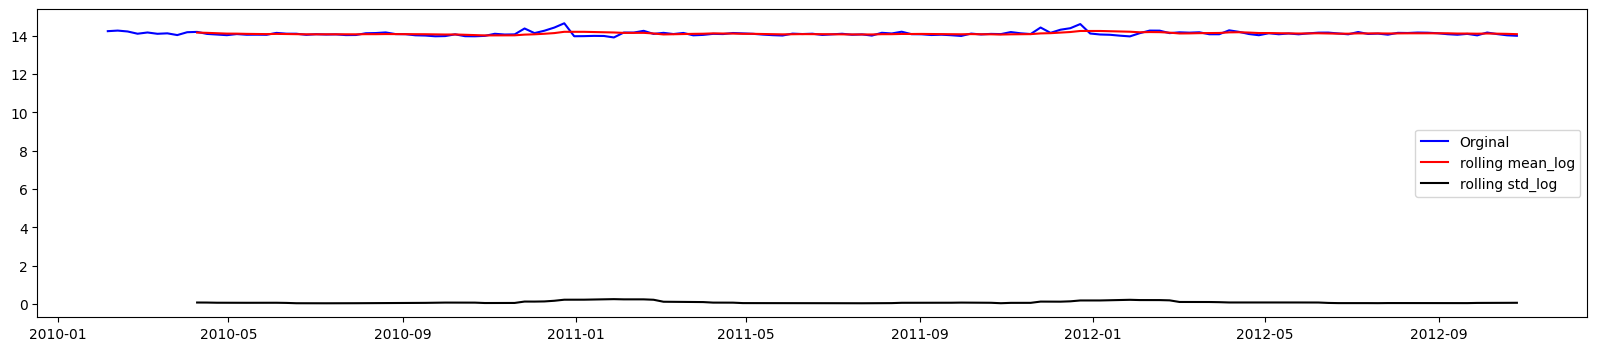

In [189]:
# After the log transformation to the data we are comparing the actual data with rolling mean and standard deviation
mean_log = df_log.rolling(window = 10).mean()
std_log = df_log.rolling(window = 10).std()
plt.figure(figsize=(20,4))
plt.plot(df_log,color= 'blue',label = 'Orginal')
plt.plot(mean_log, color = 'red', label = 'rolling mean_log')
plt.plot(std_log, color = 'black', label = 'rolling std_log')
plt.legend(loc = 'best')
plt.show()

In [190]:

df_new = df_log - mean_log
df_new.head(20)

Weekly_Sales
Date                    
2010-02-05           NaN
2010-02-12           NaN
2010-02-19           NaN
2010-02-26           NaN
2010-03-05           NaN
2010-03-12           NaN
2010-03-19           NaN
2010-03-26           NaN
2010-04-02           NaN
2010-04-09      0.035252
2010-04-16     -0.055746
2010-04-23     -0.065608
2010-04-30     -0.081209
2010-05-07     -0.022510
2010-05-14     -0.045942
2010-05-21     -0.037492
2010-05-28     -0.035700
2010-06-04      0.052225
2010-06-11      0.018392
2010-06-18      0.025654

In [191]:
df_new.dropna(inplace = True)

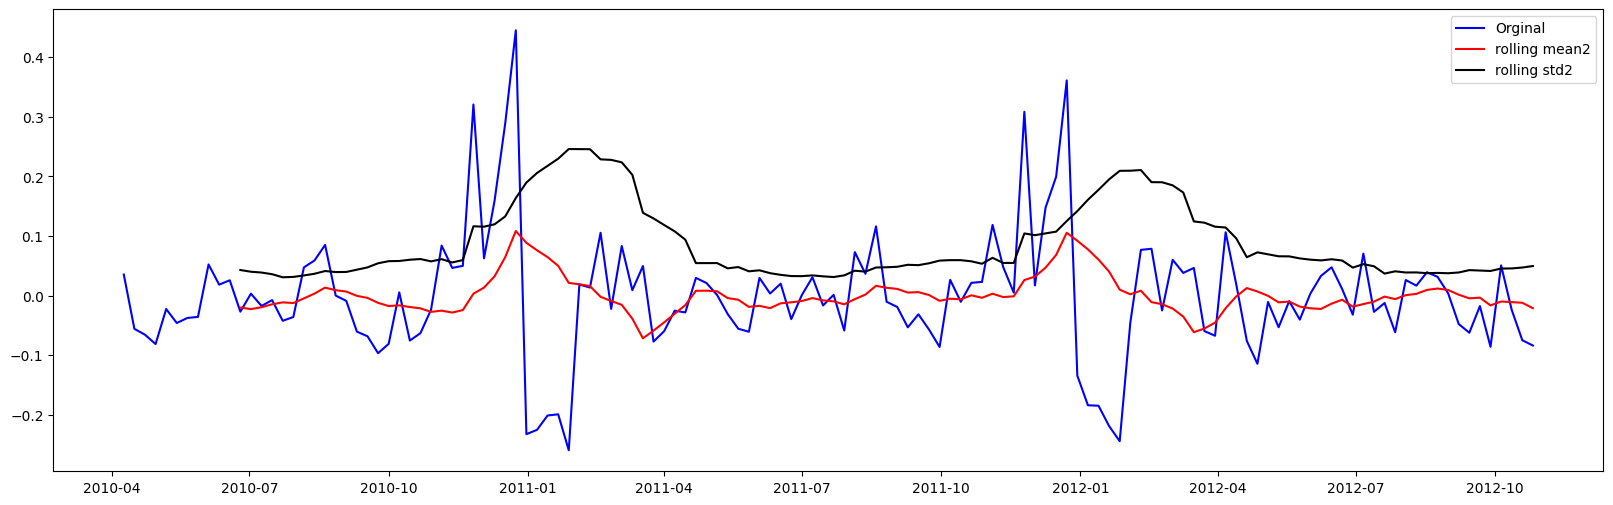

In [192]:

mean2 = df_new.rolling(window = 12).mean()
std2 = df_new.rolling(window = 12).std()

plt.figure(figsize=(20,6))
plt.plot(df_new,color= 'blue',label = 'Orginal')
plt.plot(mean2, color = 'red', label = 'rolling mean2')
plt.plot(std2, color = 'black', label = 'rolling std2')
plt.legend(loc = 'best')
plt.show()

In [193]:
adf_test(df_new['Weekly_Sales'],title='ADF TEST')

Augmented Dickey-Fuller Test: ADF TEST
ADF test statistic       -4.633134
p-value                   0.000112
# lags used              12.000000
# observations          121.000000
critical value (1%)      -3.485585
critical value (5%)      -2.885739
critical value (10%)     -2.579676
Rejects the null hypothesis
Data has no unit root and is stationary


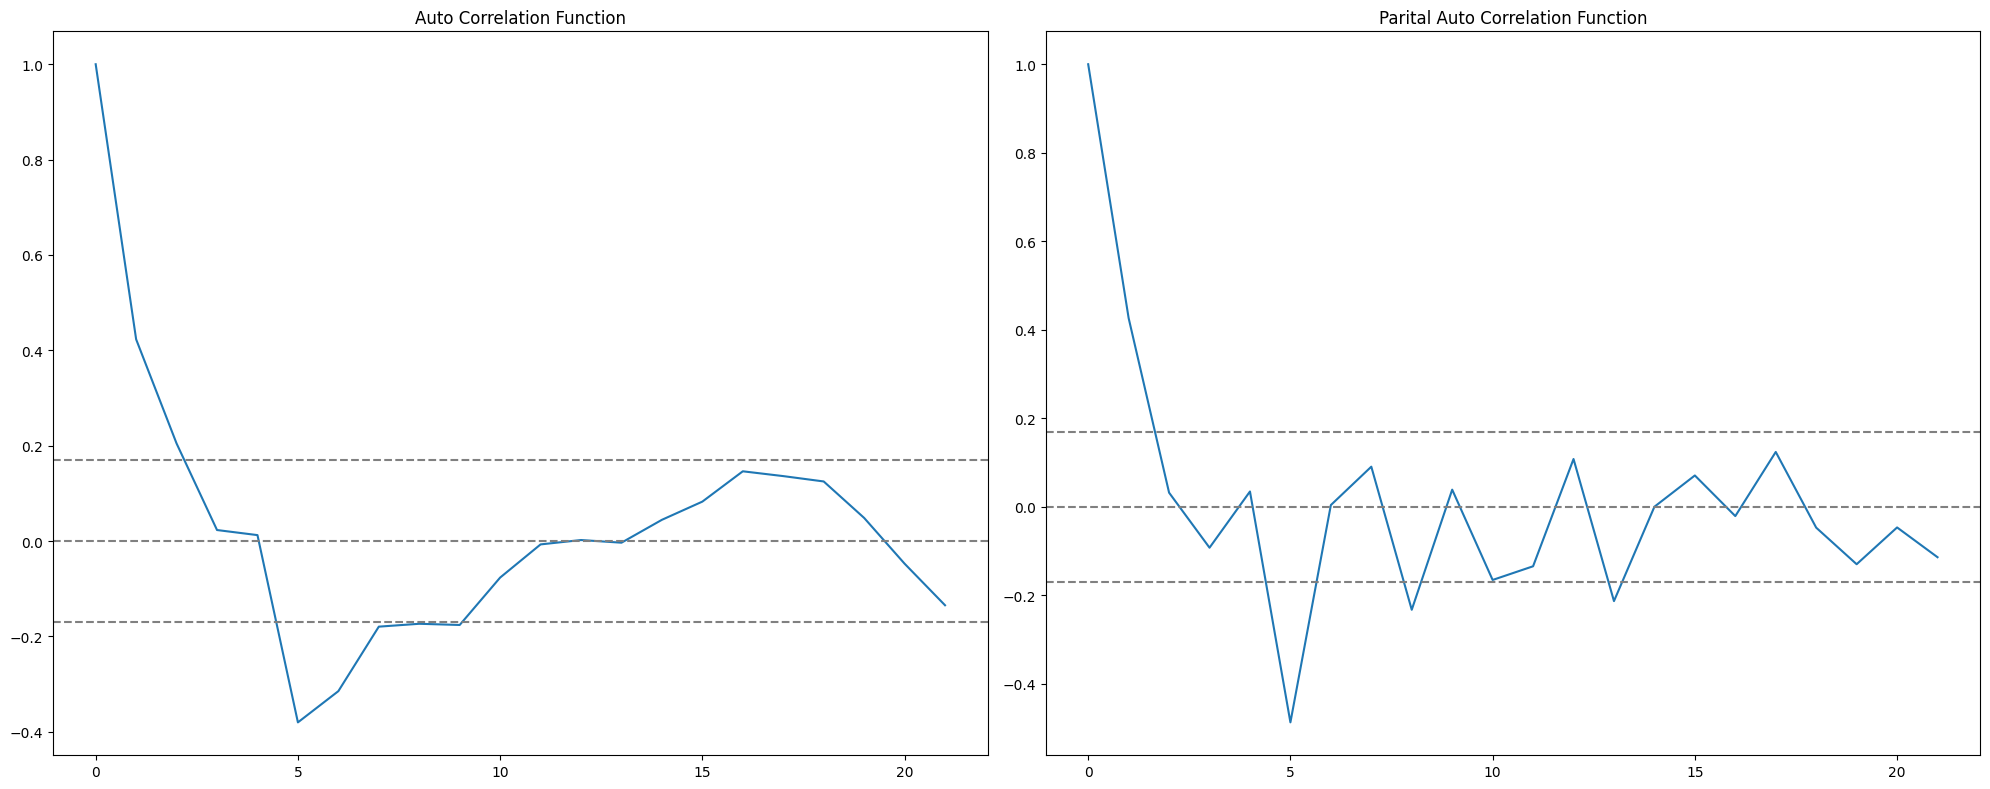

In [194]:

from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(df_new)
lag_pacf=pacf(df_new)


plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Auto Correlation Function')
plt.tight_layout()

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df_new)),linestyle='--',color='gray')
plt.title('Parital Auto Correlation Function')
plt.tight_layout()

In [198]:

p, d, q = 3, 1, 4
model = ARIMA(df_new, order=(p, d, q))
arima_result = model.fit()

# Get predictions on historical data
predictions = arima_result.predict()

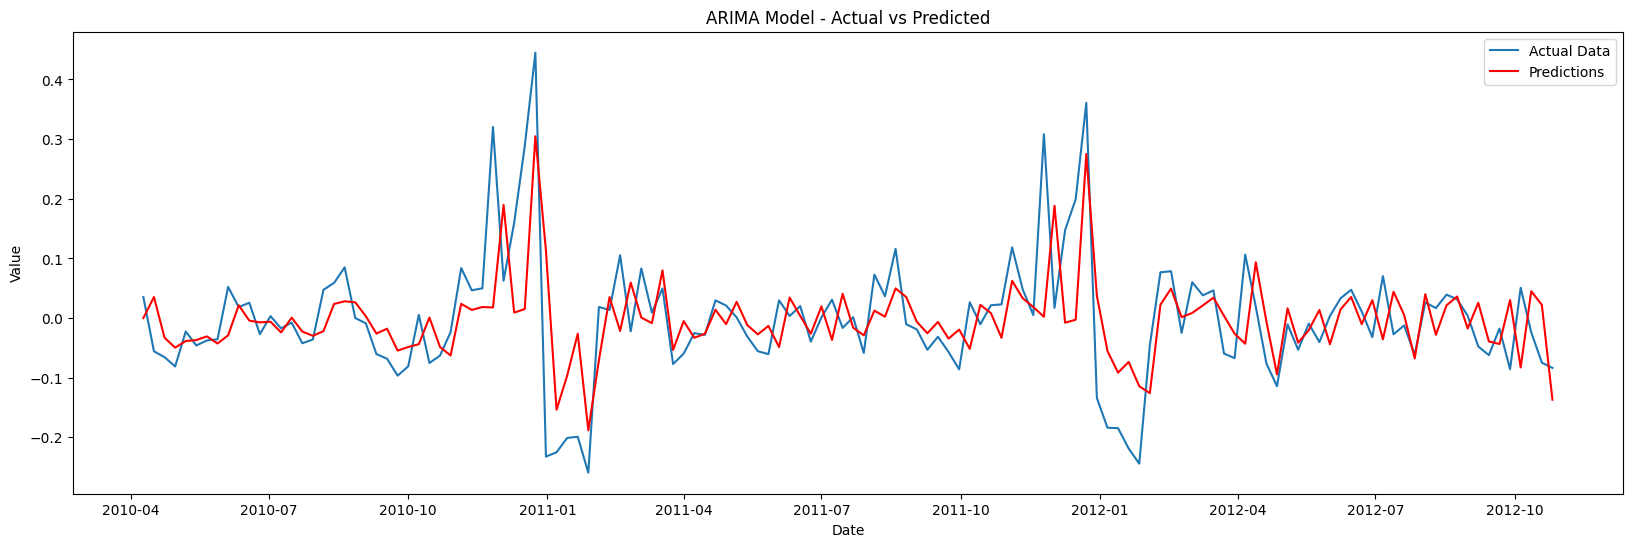

In [199]:
# Plotting the actual and predictions
plt.figure(figsize=(20,6))
plt.plot(df_new, label='Actual Data')
plt.plot(predictions, color='red', label='Predictions')
plt.title('ARIMA Model - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [200]:
mse=mean_squared_error(df_new,predictions) # Checking the accuracy of the model with mse
print(f'Mean Squared_Error  {mse}')

Mean Squared_Error  0.0072436213412456095


In [201]:
rmse=np.sqrt(mse) # Checking the accuracy of the model with rmse
print(f'Root Mean Squared_Error  {rmse}')

Root Mean Squared_Error  0.0851094668133082


In [204]:
forecast_steps = 12
forecast = arima_result.forecast(steps=forecast_steps)

In [205]:
end_date_actual_data = '2012-12-10'
forecast_start_date = pd.to_datetime(end_date_actual_data) + pd.DateOffset(weeks=0)
forecast_end_date = forecast_start_date + pd.DateOffset(weeks=len(forecast))
forecast_dates = pd.date_range(start=forecast_start_date, end=forecast_end_date, freq='W')

In [206]:

forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted_Sales': forecast})

In [207]:
forecast_df.set_index('Date',inplace=True) # setting the date as an index

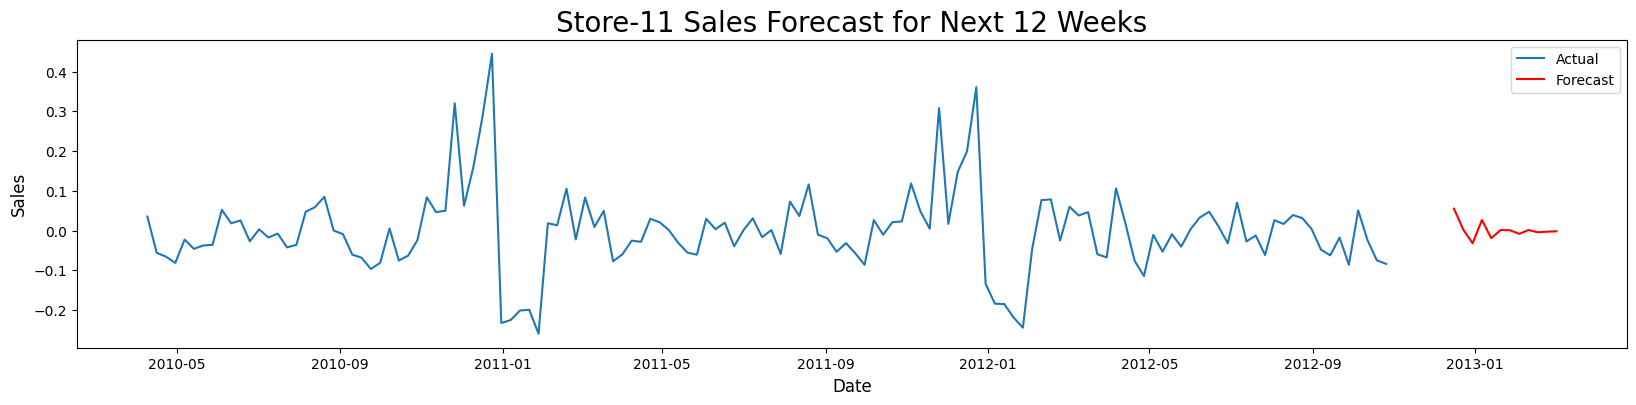

In [208]:
plt.figure(figsize=(20, 4))# plotting the actual and forcaste sales for next 12 weeks
plt.plot(df_new, label='Actual')
plt.plot(forecast_df, label='Forecast', color='red')
plt.title('Store-33 Sales Forecast for Next 12 Weeks',fontsize=20)
plt.xlabel('Date',fontsize=12)
plt.ylabel('Sales',fontsize=12)
plt.legend()
plt.show()

In [209]:

rmse=np.sqrt(mse)
print(f'Root Mean Squared_Error {rmse}')

Root Mean Squared_Error 0.0851094668133082
